# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [3]:
# Importing the dataset
datavisa = pd.read_csv(
    r"C:\Users\igorm\OneDrive\Desktop\CAREER_DS_BIG DATA\UNIVERSITY OF TEXAS DS_BA\DATA FILES\EasyVisa.csv"
)

<IPython.core.display.Javascript object>

In [4]:
# Lets create a new copy of the data
data = datavisa.copy()

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [5]:
# Checking the first 10 rows of the data
data.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


<IPython.core.display.Javascript object>

In [6]:
# Checking the last 10 rows of the data
data.tail(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25471,EZYV25472,Asia,High School,N,N,40224,1962,Island,75587.4200,Year,Y,Certified
25472,EZYV25473,Asia,High School,N,N,1346,2003,Midwest,76155.6000,Year,N,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.9100,Year,Y,Certified


<IPython.core.display.Javascript object>

In [7]:
# Creating a random sample from the dataset to visualize it
data.sample(n=20, random_state=6)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
5078,EZYV5079,Asia,Bachelor's,Y,N,1260,2007,West,265.7185,Hour,Y,Certified
24152,EZYV24153,Asia,Doctorate,Y,N,1637,1989,West,153710.7900,Year,Y,Certified
11173,EZYV11174,Asia,Master's,N,N,8280,1998,West,103.6400,Hour,Y,Denied
760,EZYV761,Europe,Master's,N,Y,598,2006,Northeast,68640.8900,Year,Y,Certified
11487,EZYV11488,North America,Master's,Y,N,2193,1969,Northeast,66487.6900,Week,Y,Denied
9587,EZYV9588,Asia,Bachelor's,Y,N,547172,1838,Northeast,22859.2200,Year,N,Certified
24711,EZYV24712,Europe,Bachelor's,N,N,3889,1976,West,12068.0600,Year,Y,Certified
3359,EZYV3360,Asia,Master's,Y,N,3673,2000,South,111403.7500,Year,Y,Certified
12163,EZYV12164,Asia,High School,Y,N,2936,2012,Midwest,106274.5500,Year,Y,Denied
20612,EZYV20613,Asia,High School,Y,N,1846,1997,Northeast,88903.2300,Year,Y,Certified


<IPython.core.display.Javascript object>

In [8]:
# Checking the shape of the data
data.shape

(25480, 12)

<IPython.core.display.Javascript object>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

In [10]:
# checking for duplicate values
data.duplicated().value_counts()

False    25480
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
# Checking the number of unique values for the variable case_id
data["case_id"].unique

<bound method Series.unique of 0           EZYV01
1           EZYV02
2           EZYV03
3           EZYV04
4           EZYV05
           ...    
25475    EZYV25476
25476    EZYV25477
25477    EZYV25478
25478    EZYV25479
25479    EZYV25480
Name: case_id, Length: 25480, dtype: object>

<IPython.core.display.Javascript object>

In [12]:
# Lets drop the variable case_id since it is not relevant for this project
data = data.drop(["case_id"], axis=1)

<IPython.core.display.Javascript object>

In [13]:
# Validating the variable dropped
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


<IPython.core.display.Javascript object>

#### Observations:
* Having this approach and obtaining information about the dataset give us an idea about the strategy to identify and handle the missing values or any other issue within the dataset.
* The dataset has 12 and 25480 rows.
* There are a total of 25480 non-null observations in all the columns so we have not missing values.
* The columns of the dataset are as follow: "continent", "education_of_employee", "has_job_experience", "requires_job_training", "no_of_employees", "yr_of_estab", "region_of_employment ", "prevailing_wage", "unit_of_wage", "full_time_position ", "case_status".
* The dataset contains 11 columns: 8 are object type('continent ', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', and 'case_status'), 2 corresponds to a integer64 type ('no_of_employees' and 'yr_of_estab'), and just 1 belongs to float64 type('prevailing_wage).
* The total memory usage is approximately 2.1+ MB, which is low.
* We do not have duplicated values in our dataset.
* Having a look on the first 10 rows of the dataset, the last 10, and extracting a 20 rows random sample, we can see thta the most relevant issue is that no_of _employee variable has negative values possibly due to a mistyping error.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [14]:
# Checking the statistical summary of the data
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


<IPython.core.display.Javascript object>

#### Observations:
* As we commented before, the variable no_of_employees has a negatives values so we should check deeper on it to determine a possible solution for this issue since it does not make sense.

In [15]:
# Lets check the negative values in the no_of_employee column
data.loc[data.no_of_employees < 0, :]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


<IPython.core.display.Javascript object>

In [16]:
# Sumarizing the negatives values withi the no_of_employees column
data.loc[data.no_of_employees < 0, :].value_counts().sum()

33

<IPython.core.display.Javascript object>

In [17]:
# One of the possible solutions could be assuming the median of the data within the column or simply take the absolute value
# since this issue might be due to mistyping error
# Lets assume the absolute value for the negatives values
data["no_of_employees"] = abs(data["no_of_employees"])

<IPython.core.display.Javascript object>

In [18]:
# Validating if the values were converted to positive values
data.loc[data.no_of_employees < 0, :].value_counts().sum()

0

<IPython.core.display.Javascript object>

In [19]:
# Checking the categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
--------------------------------------------------
Y    22773
N     2707
Name: full_time_position, dty

<IPython.core.display.Javascript object>

In [20]:
# Checking the % percental weight of each category within the "continent" variable
data["continent"].value_counts("continent")

Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: continent, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The categories in this variable (continent) corresponds to: Asia, Europe, North America, South America, Africa, Oceania.
* "Asia" (16861) category represents the 66.17% of the variable, "Europe" (3732) represents the 14.64%, "North America"(3292) 12.91%, "South America"(852) 3.34%, "Africa"(551) with 2,16%, and "Oceania"(192) with 0.7%.

In [21]:
# Checking the % percental weight of each category within the "education_of_employee" variable
data["education_of_employee"].value_counts("education_of_employee")

Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: education_of_employee, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The categories in this variable (education_of_employee) corresponds to: Bachelor's, Master's , High School , Doctorate.
* "Bachelor's" (10234) category represents the 40.16% of the variable, "Master's" (9634) represents the 37.81%, "High School"(3420) 13.42%, and "Doctorate"(2192) with 8.60%.

In [22]:
# Checking the % percental weight of each category within the "has_job_experience" variable
data["has_job_experience"].value_counts("has_job_experience")

Y    0.580926
N    0.419074
Name: has_job_experience, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The categories in this variable (has_job_experience) corresponds to: YES and NO.
* "YES" (14802) category represents the 58.09% of the variable, and "NO" (10678) represents the 41.90%.

In [23]:
# Checking the % percental weight of each category within the "requires_job_training" variable
data["requires_job_training"].value_counts("requires_job_training")

N    0.884027
Y    0.115973
Name: requires_job_training, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The categories in this variable (requires_job_training) corresponds to: YES and NO.
* "NO" (22525) category represents the 88.40% of the variable, and "YES" (2955) represents the 11.59%.

In [24]:
# Checking the % percental weight of each category within the "region_of_employment" variable
data["region_of_employment"].value_counts("region_of_employment")

Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: region_of_employment, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The categories in this variable (region_of_employment) corresponds to: Northeast, South  , West  , Midwest, and Island.
* "Northeast" (7195) category represents the 28.23% of the variable, "South" (7017) represents the 27.53%, "West"(6586) 25.84%, "Midwest(4307) with 16.90%, and "Island" representing the 1%.

In [25]:
# Checking the % percental weight of each category within the "unit_of_wage" variable
data["unit_of_wage"].value_counts("unit_of_wage")

Year     0.901177
Hour     0.084655
Week     0.010675
Month    0.003493
Name: unit_of_wage, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The categories in this variable (unit_of_wage) corresponds to: Year, Hour, Week, and Month.
* "Year" (22962) category represents the 90.11% of the variable, "Hour" (2157) represents the 8%, "Week"(272) 1%, and "Month"(89) with 0.3%.

In [26]:
# Checking the % percental weight of each category within the "full_time_position" variable
data["full_time_position"].value_counts("full_time_position")

Y    0.89376
N    0.10624
Name: full_time_position, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The categories in this variable (full_time_position) corresponds to: YES and NO.
* "YES" (22773) category represents the 89.37% of the variable, and "NO" (2707) represents the 10.62%.

In [27]:
# Checking the % percental weight of each category within the "case_status" variable
data["case_status"].value_counts("case_status")

Certified    0.667896
Denied       0.332104
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The categories in this variable (case_status) corresponds to: Certified and Denied .
* "Certified" (17018) category represents the 66.78% of the variable, and "Denied" (8462) represents the 33.21%.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## Univariate & Bivariate Analysis

In [28]:
# Function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### prevailing wage

In [29]:
# Function to plot an histogram boxplot.
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    mean = data[feature].mean()
    median = data[feature].median()
    mode = data[feature].mode()
    mode_count = data[feature].mode().count()

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="seismic"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

    # Adding the mean to the histogram
    ax_hist2.axvline(mean, color="green", linestyle="--")
    # Adding the median to the histogram
    ax_hist2.axvline(median, color="black", linestyle="-")
    # Adding the 6 modes to the histogram
    ax_hist2.axvline(mode[0], color="red", linestyle="-", label="Mode1")
    ax_hist2.axvline(mode[1], color="red", linestyle="-", label="Mode1")
    ax_hist2.axvline(mode[2], color="red", linestyle="-", label="Mode1")
    ax_hist2.axvline(mode[3], color="red", linestyle="-", label="Mode1")
    # Adding the mean of the 6 modes to the histogram
    ax_hist2.axvline(mode.mean(), color="purple", linestyle="-")

<IPython.core.display.Javascript object>

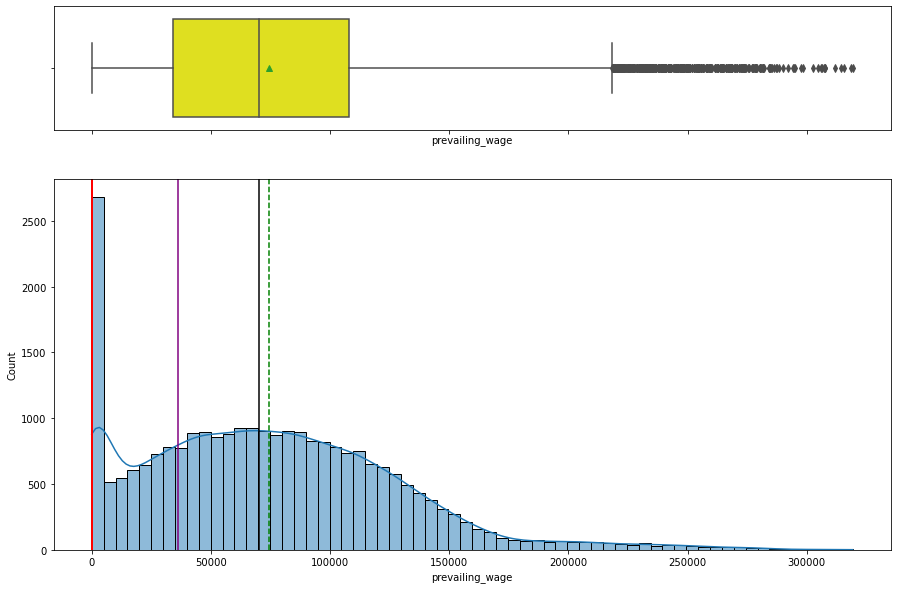

<IPython.core.display.Javascript object>

In [30]:
# Creating an histogram_boxplot for prevailing wage variable
histogram_boxplot(data, "prevailing_wage", kde=True)

In [31]:
# Checking the mode for the variable prevailing wage
data["prevailing_wage"].mode()

0        100.66
1        102.70
2        105.96
3        108.12
4        109.06
5        110.51
6        111.11
7        113.60
8        118.43
9        122.65
10       127.89
11       134.15
12       138.76
13      6036.67
14     21894.51
15     24258.73
16     58770.05
17     60948.15
18     64357.58
19     74645.92
20     82560.28
21     87751.88
22     88664.77
23     93356.03
24    126813.75
25    149907.39
dtype: float64

<IPython.core.display.Javascript object>

In [32]:
# Checking the mean of the modes for the variable prevailing wage
data["prevailing_wage"].mode().mean()

36210.358076923076

<IPython.core.display.Javascript object>

In [33]:
# Checking the mean for the variable prevailing wage
data["prevailing_wage"].mean()

74455.81459209221

<IPython.core.display.Javascript object>

In [34]:
# Checking the mode for the variable prevailing wage
data["prevailing_wage"].median()

70308.20999999999

<IPython.core.display.Javascript object>

In [35]:
# Checking the observations which have less than 5000 prevailing wage
data.loc[data["prevailing_wage"] < 5000]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
16,Europe,Master's,Y,N,76638,1991,Midwest,3706.7900,Year,Y,Certified
36,Europe,High School,Y,N,2520,1981,West,2490.1200,Year,Y,Denied
54,Asia,Master's,Y,N,11733,1995,Northeast,230.8072,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25444,South America,Master's,Y,N,1081,1838,Northeast,156.6070,Hour,Y,Certified
25450,Asia,Bachelor's,N,N,3312,2009,Northeast,682.1048,Hour,Y,Denied
25461,Asia,Master's,Y,N,2861,2004,West,54.9196,Hour,Y,Denied
25465,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified


<IPython.core.display.Javascript object>

In [36]:
# Checking the observations which have less than 5000 prevailing wage
data.loc[data["prevailing_wage"] < 5000].value_counts().sum()

2682

<IPython.core.display.Javascript object>

In [37]:
###
# Checking the observations which have less than 2500 prevailing wage
data.loc[data["prevailing_wage"] < 2500].value_counts().sum()

2402

<IPython.core.display.Javascript object>

In [38]:
# Checking the observations which have less than 1000 prevailing wage
data.loc[data["prevailing_wage"] < 1000].value_counts().sum()

2267

<IPython.core.display.Javascript object>

In [39]:
# Checking the observations which have less than 500 prevailing wage
data.loc[data["prevailing_wage"] < 500].value_counts().sum()

1394

<IPython.core.display.Javascript object>

#### Observations:
* There is an anomaly in the distribution of the prevailing wage variable around 5000.
* We can observe a positive(+) skewness and the kurtosis tends to be Platykurtic or negative.
* 2682 samples are under 5000.
* 2402 samples are under 2500.
* 2267 samples are under 1000.
* 1394 samples are under 500.

### yr_of_estab

In [40]:
# Checking the mode for the variable prevailing wage
data["yr_of_estab"].mode()

0    1998
dtype: int64

<IPython.core.display.Javascript object>

In [41]:
# Checking the mean for the variable prevailing wage
data["yr_of_estab"].mean()

1979.409929356358

<IPython.core.display.Javascript object>

In [42]:
# Checking the mean for the variable prevailing wage
data["yr_of_estab"].median()

1997.0

<IPython.core.display.Javascript object>

In [43]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

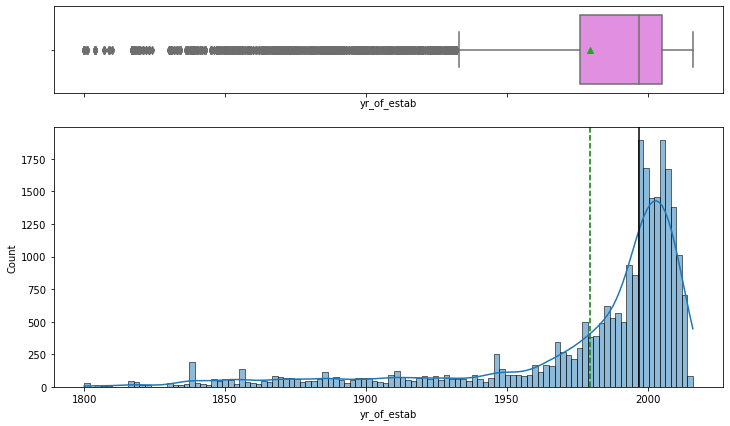

<IPython.core.display.Javascript object>

In [44]:
# Creating an histogram_boxplot for prevailing wage variable
histogram_boxplot(data, "yr_of_estab", kde=True)

In [45]:
# Calculating the 25th quantile & 75th quantile for the variable "yr_of_estab"
Q1 = data["yr_of_estab"].quantile(0.25)
Q3 = data["yr_of_estab"].quantile(0.75)
# Calculating IQR
IQR = Q3 - Q1
# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Lower_Whisker = Q1 - 1.5 * IQR
print("Q1 =", Q1)
print("Q3 =", Q3)
print("Upper Whisker =", Upper_Whisker)
print("Lower Whisker =", Lower_Whisker)

Q1 = 1976.0
Q3 = 2005.0
Upper Whisker = 2048.5
Lower Whisker = 1932.5


<IPython.core.display.Javascript object>

#### Observations:
* We can observe a negative(-) skewness and the kurtosis seems to be positive or leptokurtic.
* Median(1997) and mode(1998) are very close from each other. The mean is 1979.
* There are outliers under the lower whisker around 1932.

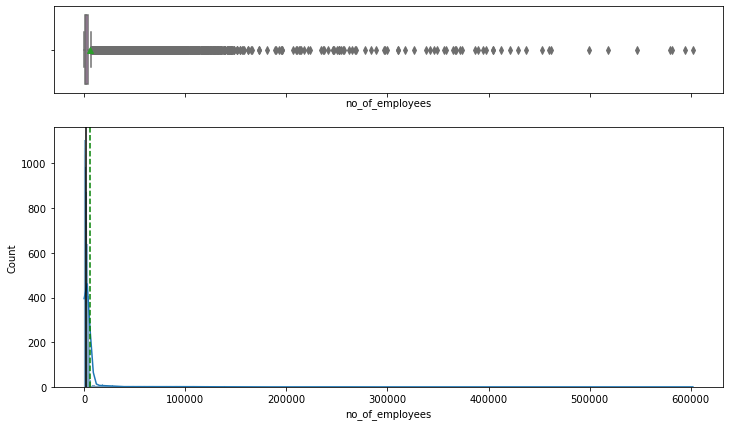

<IPython.core.display.Javascript object>

In [46]:
# Creating an histogram_boxplot for the variable no_of_employees
histogram_boxplot(data, "no_of_employees", kde=True)

In [47]:
# Calculating the 25th quantile & 75th quantile for the variable "no_of_employees"
Q1 = data["no_of_employees"].quantile(0.25)
Q3 = data["no_of_employees"].quantile(0.75)
# Calculating IQR
IQR = Q3 - Q1
# Calculating value of upper whisker 
Upper_Whisker = Q3 + 1.5 * IQR
Lower_Whisker = Q1 - 1.5 * IQR
print("Q1 =", Q1)
print("Q3 =", Q3)
print("Upper Whisker =", Upper_Whisker)


Q1 = 1022.0
Q3 = 3504.0
Upper Whisker = 7227.0


<IPython.core.display.Javascript object>

In [48]:
# Calculating the mode of the no_of_employees
data["no_of_employees"].mode()

0    183
dtype: int64

<IPython.core.display.Javascript object>

In [49]:
# Calculating the median of the no_of_employees
data["no_of_employees"].median()

2109.0

<IPython.core.display.Javascript object>

In [50]:
# Calculating the mean of the no_of_employees
data["no_of_employees"].mean()

5667.08920722135

<IPython.core.display.Javascript object>

#### Observations:
* The distribution seems unimodal.
* There are outliers over 3500 in the employees number since this sample gather companies with different sizes.
* The mode is 183.
* The median is 2109.
* The mean is 5667.

In [51]:
# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [52]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [53]:
# Function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### continent

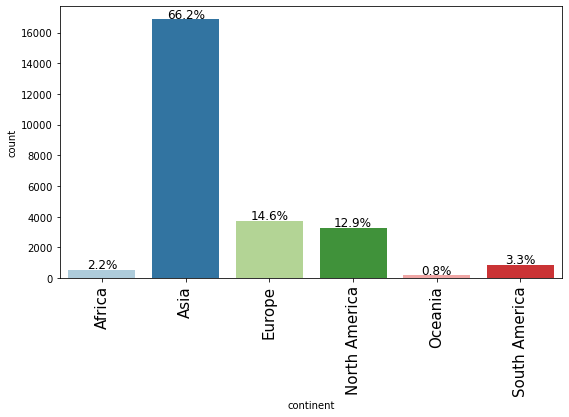

<IPython.core.display.Javascript object>

In [54]:
labeled_barplot(data, "continent", perc=True, n=8)

In [55]:
# Validating the number of samples coming from Asia
data[data["continent"] == "Asia"].value_counts().sum()

16861

<IPython.core.display.Javascript object>

In [56]:
# Validating the number of samples including Asia as the continent and additionally were Certified
data[
    (data["continent"] == "Asia") & (data["case_status"] == "Certified")
].value_counts().sum()

11012

<IPython.core.display.Javascript object>

In [57]:
# Validating the number of samples including Asia as the continent and additionally were Denied
data[
    (data["continent"] == "Asia") & (data["case_status"] == "Denied")
].value_counts().sum()

5849

<IPython.core.display.Javascript object>

In [58]:
# Validating the number of samples coming from Europe
data[data["continent"] == "Europe"].value_counts().sum()

3732

<IPython.core.display.Javascript object>

In [59]:
# Validating the number of samples including Europe as the continent and additionally were Certified
data[
    (data["continent"] == "Europe") & (data["case_status"] == "Certified")
].value_counts().sum()

2957

<IPython.core.display.Javascript object>

In [60]:
# Validating the number of samples including Europe as the continent and additionally were Denied
data[
    (data["continent"] == "Europe") & (data["case_status"] == "Denied")
].value_counts().sum()

775

<IPython.core.display.Javascript object>

In [61]:
# Validating the number of samples coming from North America
data[data["continent"] == "North America"].value_counts().sum()

3292

<IPython.core.display.Javascript object>

In [62]:
# Validating the number of samples including North America as the continent and additionally were Certified
data[
    (data["continent"] == "North America") & (data["case_status"] == "Certified")
].value_counts().sum()

2037

<IPython.core.display.Javascript object>

In [63]:
# Validating the number of samples including North America as the continent and additionally were Denied
data[
    (data["continent"] == "North America") & (data["case_status"] == "Denied")
].value_counts().sum()

1255

<IPython.core.display.Javascript object>

In [64]:
# Validating the number of samples coming from South America
data[data["continent"] == "South America"].value_counts().sum()

852

<IPython.core.display.Javascript object>

In [65]:
# Validating the number of samples including South America as the continent and additionally were Certified
data[
    (data["continent"] == "South America") & (data["case_status"] == "Certified")
].value_counts().sum()

493

<IPython.core.display.Javascript object>

In [66]:
# Validating the number of samples including South America as the continent and additionally were Denied
data[
    (data["continent"] == "South America") & (data["case_status"] == "Denied")
].value_counts().sum()

359

<IPython.core.display.Javascript object>

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


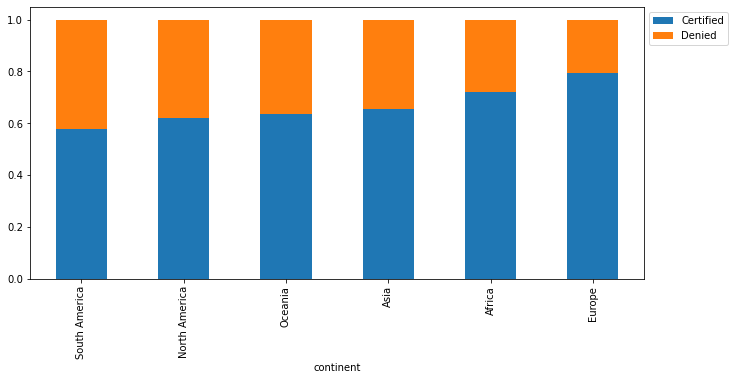

<IPython.core.display.Javascript object>

In [67]:
# Creating a stacked barplot to evaluate the relationship between the continent and case status variables
stacked_barplot(data, "continent", "case_status")

#### Observations:
* Asia domains with 66.2%, followed by Europe with 14.6% of the samples, the 12.9% corresponds to North America, the 3.3% corresponds to South America, 2.2% to Africa, and the lowest percentage corresponds to the samples from Oceania with 0.8%.
* 11012 samples out 16861 belongs to the samples coming from Asia as the continent and the Visa was Certified, representing the 65.31% of the total samples coming from Asia.
* 5849 samples out 16861 belongs to the samples coming from Asia as the continent and the Visa was Denied, representing the 34.68% of the total samples coming from Asia.
* 2957 samples out 3732 belongs to the samples coming from Europe as the continent and the Visa was Certified, representing the 79.23% of the total samples coming from Europe.
* 775 samples out 3732 belongs to the samples coming from Europe as the continent and the Visa was Denied, representing the 20.76% of the total samples coming from Europe.
* 2037 samples out 3292 belongs to the samples coming from North America as the continent and the Visa was Certified, representing the 61.87% of the total samples coming from North America.
* 1255 samples out 3292 belongs to the samples coming from North America as the continent and the Visa was Denied, representing the 38.12% of the total samples coming from North America.
* 493 samples out 852 belongs to the samples coming from South America as the continent and the Visa was Certified, representing the 57.86% of the total samples coming from South America.
* 359 samples out 852 belongs to the samples coming from South America as the continent and the Visa was Denied, representing the 42.13% of the total samples coming from South America.
* The highest certification rate belongs to the people coming from Europe with 79.23%, followed by the people coming from Africa with 72%.
* The highest Denied rate belongs to the people coming from South America with 42.13%, followed by the people coming from North America with 38.12%.

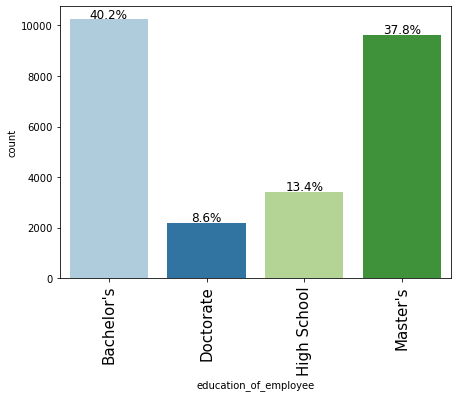

<IPython.core.display.Javascript object>

In [68]:
# Creating a labeled_barplot for the variable education of employee
labeled_barplot(data, "education_of_employee", perc=True, n=6)

In [69]:
# Validating the number of samples with a Bachelor degree in the variable education_of_employee
data[data["education_of_employee"] == "Bachelor's"].value_counts().sum()

10234

<IPython.core.display.Javascript object>

In [70]:
# Validating the number of samples including Bachelor's degree as the education and additionally the Visa was Certified
data[
    (data["education_of_employee"] == "Bachelor's")
    & (data["case_status"] == "Certified")
].value_counts().sum()

6367

<IPython.core.display.Javascript object>

In [71]:
# Validating the number of samples including Bachelor's degree as the education and additionally the Visa was Denied
data[
    (data["education_of_employee"] == "Bachelor's") & (data["case_status"] == "Denied")
].value_counts().sum()

3867

<IPython.core.display.Javascript object>

In [72]:
# Validating the number of samples with a Master's degree in the variable education_of_employee
data[data["education_of_employee"] == "Master's"].value_counts().sum()

9634

<IPython.core.display.Javascript object>

In [73]:
# Validating the number of samples including Master's degree as the education and additionally the Visa was Certified
data[
    (data["education_of_employee"] == "Master's") & (data["case_status"] == "Certified")
].value_counts().sum()

7575

<IPython.core.display.Javascript object>

In [74]:
# Validating the number of samples including Master's degree as the education and additionally the Visa was Denied
data[
    (data["education_of_employee"] == "Master's") & (data["case_status"] == "Denied")
].value_counts().sum()

2059

<IPython.core.display.Javascript object>

In [75]:
# Validating the number of samples with a High School degree in the variable education_of_employee
data[data["education_of_employee"] == "High School"].value_counts().sum()

3420

<IPython.core.display.Javascript object>

In [76]:
# Validating the number of samples including High School degree as the education and additionally the Visa was Certified
data[
    (data["education_of_employee"] == "High School")
    & (data["case_status"] == "Certified")
].value_counts().sum()

1164

<IPython.core.display.Javascript object>

In [77]:
# Validating the number of samples including High School degree as the education and additionally the Visa was Denied
data[
    (data["education_of_employee"] == "High School") & (data["case_status"] == "Denied")
].value_counts().sum()

2256

<IPython.core.display.Javascript object>

In [78]:
# Validating the number of samples with a Doctorate degree in the variable education_of_employee
data[data["education_of_employee"] == "Doctorate"].value_counts().sum()

2192

<IPython.core.display.Javascript object>

In [79]:
# Validating the number of samples including Doctorate degree as the education and additionally the Visa was Certified
data[
    (data["education_of_employee"] == "Doctorate")
    & (data["case_status"] == "Certified")
].value_counts().sum()

1912

<IPython.core.display.Javascript object>

In [80]:
# Validating the number of samples including Doctorate degree as the education and additionally the Visa was Denied
data[
    (data["education_of_employee"] == "Doctorate") & (data["case_status"] == "Denied")
].value_counts().sum()

280

<IPython.core.display.Javascript object>

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


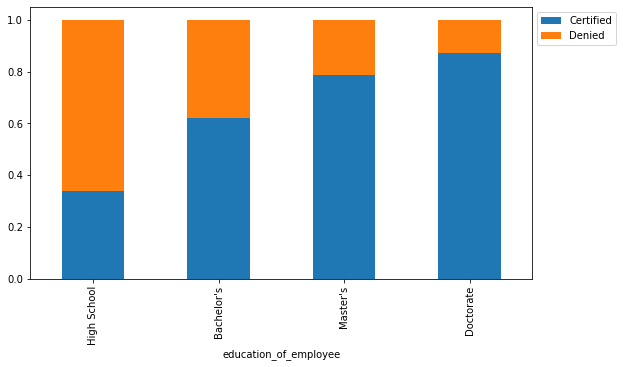

<IPython.core.display.Javascript object>

In [81]:
# Creating a stacked barplot to evaluate the relationship between the education_of_employee and case status variables
stacked_barplot(data, "education_of_employee", "case_status")

#### Observations:
* Bachelor's domains with 40.2%, followed by the people with a Master's degree with 37.8% of the samples, the 13.4% corresponds to High School degree, and the lowest percentage corresponds to the samples with Doctorate degree with 8.6%.
* 6367 samples out 10234 belongs to the samples with a Bachelor degree and the Visa was Certified, representing the 62.21% of the total samples with a Bachelor degree.
* 3867 samples out 10234 belongs to the samples with a Bachelor degree and the Visa was Denied, representing the 37.78% of the total samples with a Bachelor degree.
* 7575 samples out 9634 belongs to the samples with a Master's degree and the Visa was Certified, representing the 78.62% of the total samples with a Master's degree.
* 2059 samples out 9634 belongs to the samples with a Master's degree and the Visa was Denied, representing the 21.37% of the total samples with a Master's degree.
* 1164 samples out 3420 belongs to the samples with a High School degree and the Visa was Certified, representing the 34.03% of the total samples with a High School degree.
* 2256 samples out 3420 belongs to the samples with a High School degree and the Visa was Denied, representing the 65.96% of the total samples with a High School degree.
* 1912 samples out 2192 belongs to the samples with a Doctorate degree and the Visa was Certified, representing the 87.22% of the total samples with a Doctorate degree.
* 280 samples out 2192 belongs to the samples with a Doctorate degree and the Visa was Denied, representing the 12.77% of the total samples with a Doctorate degree.
* The highest certification rate belongs to the people with a Doctorate degree with 87.22%, followed by the people with a Master's degree with 78.62%.
* The highest Denied rate belongs to the people with a High School degree 65.96%, followed by the people with Bachelor degree with 37.78%

### job experience

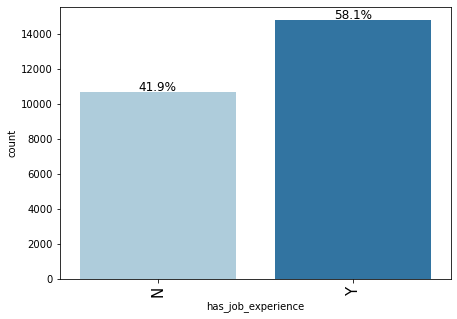

<IPython.core.display.Javascript object>

In [82]:
# Creating a labeled_barplot for the variable job experience
labeled_barplot(data, "has_job_experience", perc=True, n=6)

In [83]:
# Validating the number of samples with has_job_experience equal YES
data[data["has_job_experience"] == "Y"].value_counts().sum()

14802

<IPython.core.display.Javascript object>

In [84]:
# Validating the number of samples with has_job_experience equal NO
data[data["has_job_experience"] == "N"].value_counts().sum()

10678

<IPython.core.display.Javascript object>

In [85]:
# Validating the number of samples with job experience and additionally the Visa was Certified
data[
    (data["has_job_experience"] == "Y") & (data["case_status"] == "Certified")
].value_counts().sum()

11024

<IPython.core.display.Javascript object>

In [86]:
# Validating the number of samples with job experience and additionally the Visa was Denied
data[
    (data["has_job_experience"] == "Y") & (data["case_status"] == "Denied")
].value_counts().sum()

3778

<IPython.core.display.Javascript object>

In [87]:
# Validating the number of samples with NO job experience and additionally the Visa was Certified
data[
    (data["has_job_experience"] == "N") & (data["case_status"] == "Certified")
].value_counts().sum()

5994

<IPython.core.display.Javascript object>

In [88]:
# Validating the number of samples with NO job experience and additionally the Visa was Denied
data[
    (data["has_job_experience"] == "N") & (data["case_status"] == "Denied")
].value_counts().sum()

4684

<IPython.core.display.Javascript object>

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


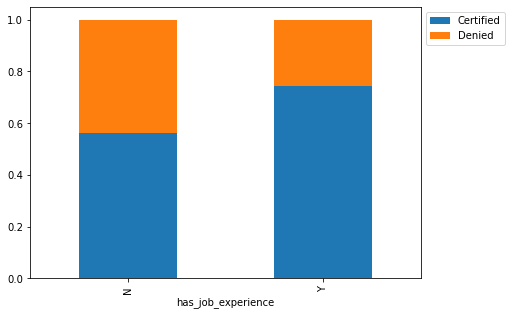

<IPython.core.display.Javascript object>

In [89]:
# Creating a stacked barplot for job experience and case status
stacked_barplot(data, "has_job_experience", "case_status")

#### Observations:
* People with job experience domains with 58.1% and the remaining 41.9% belongs to the samples with NO job  experience.
* 11024 samples out 14802 belongs to the samples with Job experience and the Visa was Certified, representing the 74.47% of the total samples with JOB EXPERIENCE.
* 3778 samples out 14802 belongs to the samples with Job experience and the Visa was Denied, representing the 25.52% of the total samples with JOB EXPERIENCE.
* 5994 samples out 10678 belongs to the samples with NO JOB EXPERIENCE and the Visa was Certified, representing the 56.13% of the total samples with NO JOB EXPERIENCE.
* 4684 samples out 10678 belongs to the samples with NO JOB EXPERIENCE and the Visa was Denied, representing the 43.86% of the total samples with NO JOB EXPERIENCE.
* In general and as is logical, the visa denial rate increases to more than 40% if you do not have Job experience.

### job training

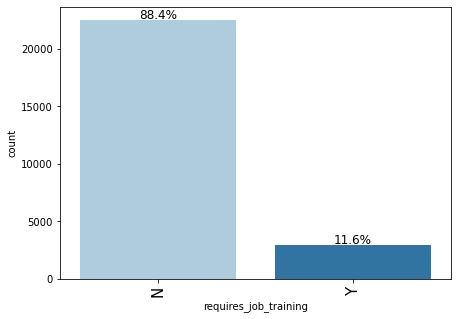

<IPython.core.display.Javascript object>

In [90]:
labeled_barplot(data, "requires_job_training", perc=True, n=6)

In [91]:
# Validating the number of samples with requires_job_training equal YES
data[data["requires_job_training"] == "Y"].value_counts().sum()

2955

<IPython.core.display.Javascript object>

In [92]:
# Validating the number of samples with requires_job_training equal NO
data[data["requires_job_training"] == "N"].value_counts().sum()

22525

<IPython.core.display.Javascript object>

In [93]:
# Validating the number of samples that requires_job_training and additionally the Visa was Certified
data[
    (data["requires_job_training"] == "Y") & (data["case_status"] == "Certified")
].value_counts().sum()

2006

<IPython.core.display.Javascript object>

In [94]:
# Validating the number of samples that requires_job_training and additionally the Visa was Denied
data[
    (data["requires_job_training"] == "Y") & (data["case_status"] == "Denied")
].value_counts().sum()

949

<IPython.core.display.Javascript object>

In [95]:
# Validating the number of samples that NOT requires_job_training and additionally the Visa was Certified
data[
    (data["requires_job_training"] == "N") & (data["case_status"] == "Certified")
].value_counts().sum()

15012

<IPython.core.display.Javascript object>

In [96]:
# Validating the number of samples that NOT requires_job_training and additionally the Visa was Denied
data[
    (data["requires_job_training"] == "N") & (data["case_status"] == "Denied")
].value_counts().sum()

7513

<IPython.core.display.Javascript object>

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


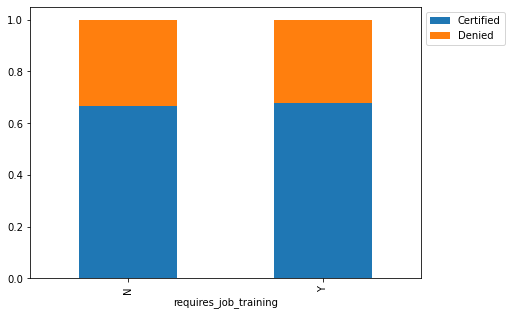

<IPython.core.display.Javascript object>

In [97]:
# Creating a stacked barplot to evaluate the relationship bewteen the variables requires_job_training and case status
stacked_barplot(data, "requires_job_training", "case_status")

#### Observations:
* People who does not requires job training domains with 88.4% and the remaining 11.6% belongs to the samples which requires job training.
* 2006 samples out 2955 belongs to the samples which requires job training and the Visa was Certified, representing the 67.88% of the total samples which requires job training.
* 949 samples out 2955 belongs to the samples which requires job training and the Visa was Denied, representing the 32.11% of the total samples which requires job training.
* 15012 samples out 22525 belongs to the samples which NOT requires job training and the Visa was Certified, representing the 66.64% of the total samples which NOT requires job training.
* 7513 samples out 22525 belongs to the samples which NOT requires job training and the Visa was Denied, representing the 33.35% of the total samples which NOT requires job training.
* The rate remains almost the same for certified and denied Visas for the require_job_training variable, both around 35%, in the case of denied visas, and around 65% for certified visas.

### region of employment

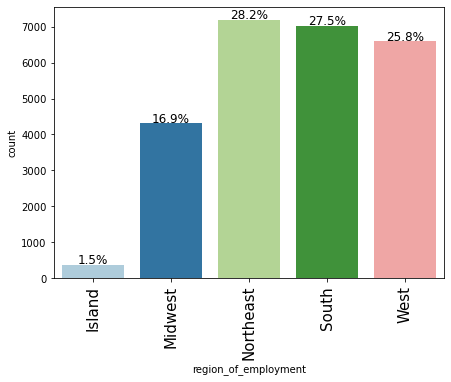

<IPython.core.display.Javascript object>

In [98]:
# Creating a labeled_barplot for the variable region of employment
labeled_barplot(data, "region_of_employment", perc=True, n=6)

In [99]:
# Validating the number of samples with region_of_employment equal to Northeast
data[data["region_of_employment"] == "Northeast"].value_counts().sum()

7195

<IPython.core.display.Javascript object>

In [100]:
# Validating the number of samples with region_of_employment equal to Northeast and additionally the Visa was Certified
data[
    (data["region_of_employment"] == "Northeast") & (data["case_status"] == "Certified")
].value_counts().sum()

4526

<IPython.core.display.Javascript object>

In [101]:
# Validating the number of samples with region_of_employment equal to Northeast and additionally the Visa was Denied
data[
    (data["region_of_employment"] == "Northeast") & (data["case_status"] == "Denied")
].value_counts().sum()

2669

<IPython.core.display.Javascript object>

In [102]:
# Validating the number of samples with region_of_employment equal to South
data[data["region_of_employment"] == "South"].value_counts().sum()

7017

<IPython.core.display.Javascript object>

In [103]:
# Validating the number of samples with region_of_employment equal to South and additionally the Visa was Certified
data[
    (data["region_of_employment"] == "South") & (data["case_status"] == "Certified")
].value_counts().sum()

4913

<IPython.core.display.Javascript object>

In [104]:
# Validating the number of samples with region_of_employment equal to South and additionally the Visa was Denied
data[
    (data["region_of_employment"] == "South") & (data["case_status"] == "Denied")
].value_counts().sum()

2104

<IPython.core.display.Javascript object>

In [105]:
# Validating the number of samples with region_of_employment equal to West
data[data["region_of_employment"] == "West"].value_counts().sum()

6586

<IPython.core.display.Javascript object>

In [106]:
# Validating the number of samples with region_of_employment equal to West and additionally the Visa was Certified
data[
    (data["region_of_employment"] == "West") & (data["case_status"] == "Certified")
].value_counts().sum()

4100

<IPython.core.display.Javascript object>

In [107]:
# Validating the number of samples with region_of_employment equal to West and additionally the Visa was Denied
data[
    (data["region_of_employment"] == "West") & (data["case_status"] == "Denied")
].value_counts().sum()

2486

<IPython.core.display.Javascript object>

In [108]:
# Validating the number of samples with region_of_employment equal to Midwest
data[data["region_of_employment"] == "Midwest"].value_counts().sum()

4307

<IPython.core.display.Javascript object>

In [109]:
# Validating the number of samples with region_of_employment equal to Midwest and additionally the Visa was Certified
data[
    (data["region_of_employment"] == "Midwest") & (data["case_status"] == "Certified")
].value_counts().sum()

3253

<IPython.core.display.Javascript object>

In [110]:
# Validating the number of samples with region_of_employment equal to Midwest and additionally the Visa was Denied
data[
    (data["region_of_employment"] == "Midwest") & (data["case_status"] == "Denied")
].value_counts().sum()

1054

<IPython.core.display.Javascript object>

In [111]:
# Validating the number of samples with region_of_employment equal to Island
data[data["region_of_employment"] == "Island"].value_counts().sum()

375

<IPython.core.display.Javascript object>

In [112]:
# Validating the number of samples with region_of_employment equal to Island and additionally the Visa was Certified
data[
    (data["region_of_employment"] == "Island") & (data["case_status"] == "Certified")
].value_counts().sum()

226

<IPython.core.display.Javascript object>

In [113]:
# Validating the number of samples with region_of_employment equal to Island and additionally the Visa was Denied
data[
    (data["region_of_employment"] == "Island") & (data["case_status"] == "Denied")
].value_counts().sum()

149

<IPython.core.display.Javascript object>

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


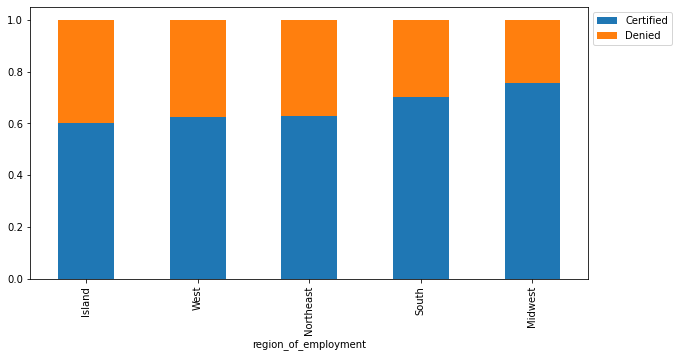

<IPython.core.display.Javascript object>

In [114]:
# Creating a stacked barplot to evaluate the relationship between the variables region_of_employment and case status
stacked_barplot(data, "region_of_employment", "case_status")

#### Observations:
* Northeast region domains with 28.2%, followed by the South region with 27.5% of the samples, the 25.8% corresponds to the North region, the 16.9% corresponds to Midwest, and the 1.5% to the Island region.
* 4526 samples out 7195 belongs to the samples coming from Northeast region and the Visa was Certified, representing the 62.90% of the total samples coming from Northeast.
* 2669 samples out 7195 belongs to the samples coming from Northeast region and the Visa was Denied, representing the 37.09% of the total samples coming from the South region.
* 4913 samples out 7017 belongs to the samples coming from South region and the Visa was Certified, representing the 70% of the total samples coming from Northeast.
* 2104 samples out 7017 belongs to the samples coming from South region and the Visa was Denied, representing the 30% of the total samples coming from the South region.
* 4100 samples out 6586 belongs to the samples coming from West region and the Visa was Certified, representing the 62.25% of the total samples coming from West.
* 2486 samples out 6586 belongs to the samples coming from West region and the Visa was Denied, representing the 37.74% of the total samples coming from the West region.
* 3253 samples out 4307 belongs to the samples coming from Midwest region and the Visa was Certified, representing the 75.52% of the total samples coming from Midwest.
* 1054 samples out 4307 belongs to the samples coming from Midwest region and the Visa was Denied, representing the 24.47% of the total samples coming from the Midwest region.
* 226 samples out 375 belongs to the samples coming from the Island region and the Visa was Certified, representing the 60.26% of the total samples coming from the Island region.
* 149 samples out 375 belongs to the samples coming from the Island region and the Visa was Denied, representing the 39.73% of the total samples coming from the Island region.
* The highest Denied rate belongs to the samples coming from the Island region with 40%, followed by the samples coming from Northeast region with 37%.
* The highest certified rate belongs to the samples coming from the Midwest region with 75.52%, followed by the samples coming from the South region with 70%.

### Region of employment vs Education of employee

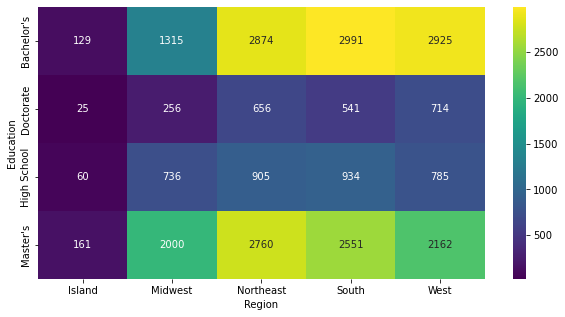

<IPython.core.display.Javascript object>

In [115]:
# Creating a heatmap for the crosstab between education of employee and region of employment
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

#### Observations:
* The largest number of applications for the region of the islands (161) are made by people with a Master's degree, while the fewest number of applications come from people with a Doctorate degree (25).
* The largest number of applications for the region of the Midwest are made by people with a Master's degree as well (2000), while the fewest number of applications come from people with a Doctorate degree(256).
* The largest number of applications for the region of the Northeast are made by people with a Bachelor's degree (2874), while the fewest number of applications come from people with a Doctorate degree(656).
* The largest number of applications for the South region are made by people with a Bachelor's degree (2991), while the fewest number of applications come from people with a Doctorate degree(541).
* The largest number of applications for the West region are made by people with a Bachelor's degree (2925), while the fewest number of applications come from people with a Doctorate degree(714).
* The largest number of applications are made by the majority of people with bachelor degrees, except in the regions of the Islands and the Midwest while the fewest number of applications in all regions come from people with a Doctorate degree.

### unit of wage

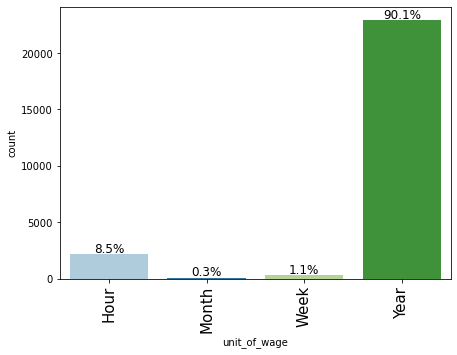

<IPython.core.display.Javascript object>

In [116]:
# Creating a labeled_barplot for the variable unit_of_wage
labeled_barplot(data, "unit_of_wage", perc=True, n=6)

In [117]:
# Validating the number of samples with unit_of_wage equal to Year
data[data["unit_of_wage"] == "Year"].value_counts().sum()

22962

<IPython.core.display.Javascript object>

In [118]:
# Validating the number of samples with unit_of_wage equal to Year and additionally the Visa was Certified
data[
    (data["unit_of_wage"] == "Year") & (data["case_status"] == "Certified")
].value_counts().sum()

16047

<IPython.core.display.Javascript object>

In [119]:
# Validating the number of samples with unit_of_wage equal to Year and additionally the Visa was Denied
data[
    (data["unit_of_wage"] == "Year") & (data["case_status"] == "Denied")
].value_counts().sum()

6915

<IPython.core.display.Javascript object>

In [120]:
# Validating the number of samples with unit_of_wage equal to Hour
data[data["unit_of_wage"] == "Hour"].value_counts().sum()

2157

<IPython.core.display.Javascript object>

In [121]:
# Validating the number of samples with unit_of_wage equal to Hour and additionally the Visa was Certified
data[
    (data["unit_of_wage"] == "Hour") & (data["case_status"] == "Certified")
].value_counts().sum()

747

<IPython.core.display.Javascript object>

In [122]:
# Validating the number of samples with unit_of_wage equal to Hour and additionally the Visa was Denied
data[
    (data["unit_of_wage"] == "Hour") & (data["case_status"] == "Denied")
].value_counts().sum()

1410

<IPython.core.display.Javascript object>

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


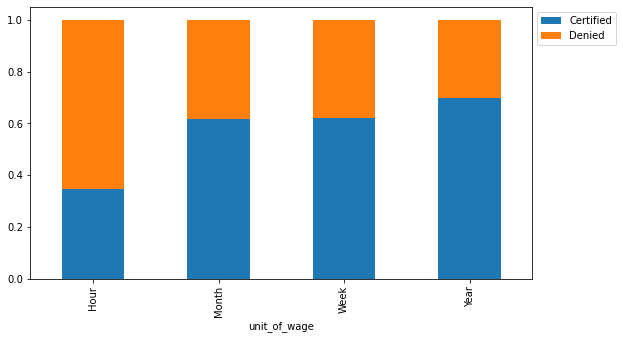

<IPython.core.display.Javascript object>

In [123]:
# Creating a stacked barplot to evaluate the relationship between the variables unit_of_wage and case status
stacked_barplot(data, "unit_of_wage", "case_status")

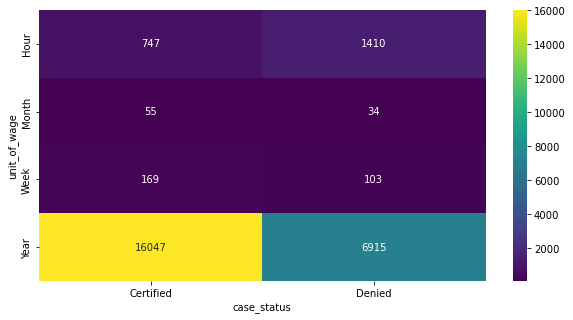

<IPython.core.display.Javascript object>

In [124]:
# Creating a heatmap for the crosstab between unit_of_wage and case_status
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["unit_of_wage"], data["case_status"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)

plt.ylabel("unit_of_wage")
plt.xlabel("case_status")
plt.show()

#### Observations:
* Year option domains with 90.1%, followed by the hour unit of wage with 8.5% of the samples, the 1.1% corresponds to the Week option, and the 0.3% corresponds to month option.
* 16047 samples out 22962 belongs to the samples coming from the Year option and the Visa was Certified, representing the 69.88% of the total samples coming from the Year option.
* 6915 samples out 22962 belongs to the samples coming from the Year option and the Visa was Denied, representing the 30.11% of the total samples coming from the Year option.
* 747 samples out 2157 belongs to the samples coming from the Hour option and the Visa was Certified, representing the 34.63% of the total samples coming from the Hour option.
* 1410 samples out 2157 belongs to the samples coming from the Hour option and the Visa was Denied, representing the 65.36% of the total samples coming from the Hour option.
* The highest Denied rate belongs to the samples coming from the Hour Option with 65%, followed by the samples coming from the Month and Week options around 40%.
* The highest certified rate belongs to the samples coming from the Year option with almost 70%, followed by the samples coming from the Month and Week options around 60%.

## case status

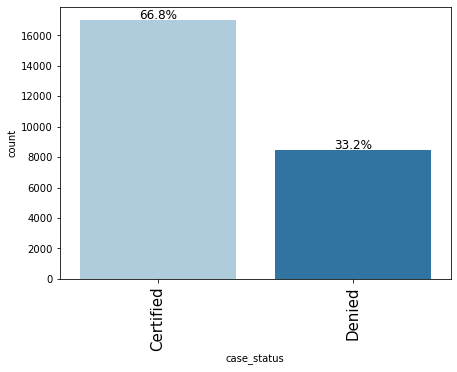

<IPython.core.display.Javascript object>

In [125]:
# Creating a labeled_barplot for the variable case_status
labeled_barplot(data, "case_status", perc=True, n=6)

In [126]:
# Validating the number of samples with case_status equal to Certified
data[data["case_status"] == "Certified"].value_counts().sum()

17018

<IPython.core.display.Javascript object>

In [127]:
# Validating the number of samples with case_status equal to Denied
data[data["case_status"] == "Denied"].value_counts().sum()

8462

<IPython.core.display.Javascript object>

#### Observations:
* In general, Certified visas represent 66.8% of the data for this project, 17.018 out of 25.480, while denied visas represent only 33%, 8.462 out of 25.480.

### Prevailing_Wage vs Region of Employment

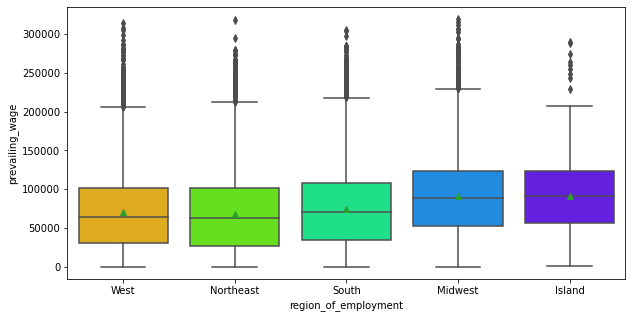

<IPython.core.display.Javascript object>

In [128]:
# Creating a boxplot for region of employment versus prevailing wage
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data,
    x="region_of_employment",
    y="prevailing_wage",
    palette="gist_rainbow",
    showfliers=True,
    showmeans=True,
)
plt.show()

#### Observations:
  * We can observe that the variance is very similar in all the regions.
  * The mean and the median remains almost equal between the West, Northeast and South regions meanwhile is a little bit higher in the Midwest and Island regions.
  * The maximun and the minimun prevailing wage value belongs to the Midwest region.
  * There are some outliers in all the regions.
  * All the regions seems to have a normal distribution.
  * Outliers seems to be in a normal range for the purpose of this project. Although, we would have to investigate a little more about the conditions that apply to each region.

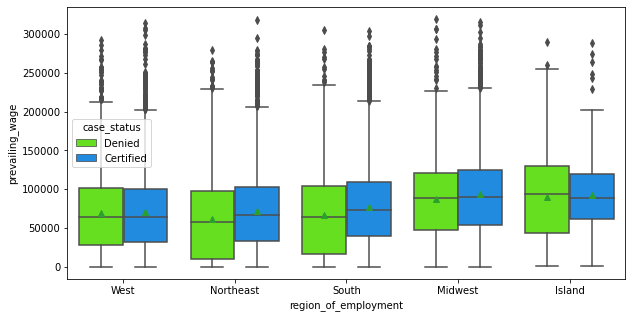

<IPython.core.display.Javascript object>

In [129]:
# Creating a boxplot for region of employment versus prevailing wage
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data,
    x="region_of_employment",
    y="prevailing_wage",
    palette="gist_rainbow",
    hue="case_status",
    showfliers=True,
    showmeans=True,
)
plt.show()

#### Observations:
  * We can observe that the variance is very similar in both categories (Certified and Denied) for all the regions.
  * The mean and the median is a little bit higher in the Midwest region.
  * The maximun and the minimun prevailing wage value in both categories belongs to the Midwest region.
  * There are some outliers in all the regions for both categories.
  * All the regions and categories(Certified and Denied) seems to have a normal distribution.
  * Seems to be higher the mean and the median in all the regions where the Visas were Denied except in the Island region.
  * Outliers seems to be in a normal range for the purpose of this project. Although, we would have to investigate a little more about the conditions that apply to each region.
  

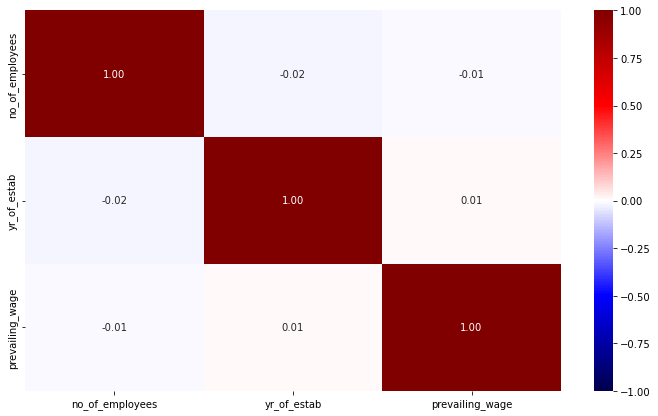

<IPython.core.display.Javascript object>

In [130]:
# Creating a correlation matrix between the numerical variables
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="seismic"
)
plt.show()

#### Observations:
* There is not evident correlation between the numerical variables of this project.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Outlier Check

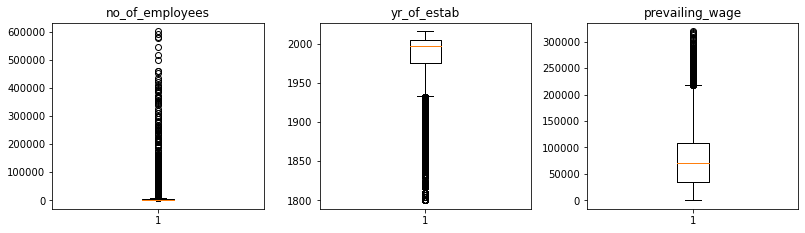

<IPython.core.display.Javascript object>

In [131]:
# Lets run the outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

#### Observations:
* For general purposes of this project, we will consider the outliers within the normal range and will not do a deep analysis of them. However, it would be advisable in later stages to investigate in more detail the outliers of these variables.

### Data Preparation for modeling

In [132]:
# We have to stablish the numerical binary code for the categories. 1 for "Certified" and 0 for "Denied"
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

<IPython.core.display.Javascript object>

In [133]:
# Validating the recent change
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


<IPython.core.display.Javascript object>

In [134]:
# Dropping booking status and declare it as the target variable
X = data.drop(["case_status"], axis=1)
y = data["case_status"]

# Creating the dummies variables for X
X = pd.get_dummies(X, drop_first=True)

# splitting the data into train test in the ratio 70:30 with random_state = 1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


<IPython.core.display.Javascript object>

In [135]:
# Obtaining the data shape for the training and test datasets and the weight of the classes
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

### Criteria for the Evaluation of the Model

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied (FALSE POSITIVES).
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified(FALSE NEGATIVES). 

### Importance of the cases (FP/FN) 
* In this specific case, both are important as:

* When the visa is certified and it had to be denied, the wrong employee is going to get the job position while US citizens will miss the opportunity to work on that position.

* When the visa is denied and it had to be certified, the United States is going to lose the possibility to get the ideal human resource who could contribute positively to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

In [136]:
# Creating the functions to calculate different metrics and confusion matrix
# Taken form the previous projects
# The model_performance_classification_sklearn function will be used to check the model performance of models.
# Defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [137]:
# The confusion_matrix_sklearn function will be used to plot the confusion matrix.
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Decision Tree Model default

In [138]:
# Creating the decision tree classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
# fitting the decision tree classifier on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking the model's performance on the training dataset

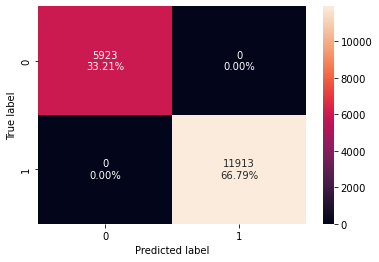

<IPython.core.display.Javascript object>

In [139]:
# Creating the confusion matrix for the training dataset
confusion_matrix_sklearn(model, X_train, y_train)

In [140]:
# Checking the performance on the training dataset
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Observations:
* F1 score and all the metrics are equal to 1.0, which suggest an overfitting within the training dataset. 
* As we expressed before, we are mainly interested in the False Negatives and False Positives. In this iteration, both FN values represents and FP values represents the 0% as we can deduce by looking at the F1 score. 
* True Negatives represents the 33.21% and the True positives TP 66.79%.

#### Checking the model's performance on the test dataset

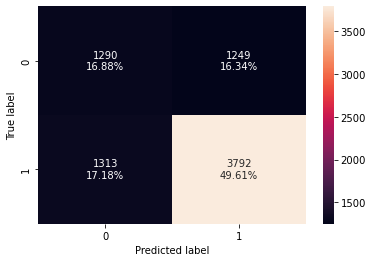

<IPython.core.display.Javascript object>

In [141]:
# Creating the confusion matrix for the test dataset
confusion_matrix_sklearn(model, X_test, y_test)

In [142]:
# running the performance's check for the test dataset
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


<IPython.core.display.Javascript object>

#### Observations:
* The Decision tree model with default parameters is overfitting since we can see a notable difference between the f1 score of the training set and the test dataset
* As we expressed before, we are mainly interested in the False Negatives and False Positives. In this iteration, the FN values represents the 17.18%, meanwhile the FP values represents the 16.34%. 
* True Negatives represents the 16.18% and the True positives TP 49.61%.
* Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### Decision Tree - Hyperparameter Tuning  

In [143]:
# Taken from Bike Sharing project
# Choosing the type of classifier.
dtree_tuned = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)

# Fitting the grid_obj on the training dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fiting the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking the model's performance on the training dataset

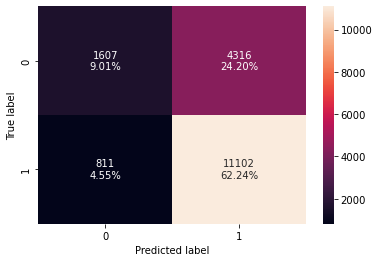

<IPython.core.display.Javascript object>

In [144]:
# Creating the confusion matrix for the training data on tuned estimator
confusion_matrix_sklearn(dtree_tuned, X_train, y_train)

#### Observations:
* The Decision tree model with hyperparameters tuning performs better in the training dataset
* In this iteration, the FN values represents the 4.55%, meanwhile the FP values represents the 24.20% so as we are interested in a good balance between FP & FN values we must find a better model o play with the hyperparameters.
* True Negatives represents the 9.01% and the True positives TP 62.24%.

In [145]:
# Running the performance check for the training data on tuned estimator
dtree_tuned_model_train_perf = model_performance_classification_sklearn(
    dtree_tuned, X_train, y_train
)

dtree_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


<IPython.core.display.Javascript object>

#### Checking the model's performance on the test dataset

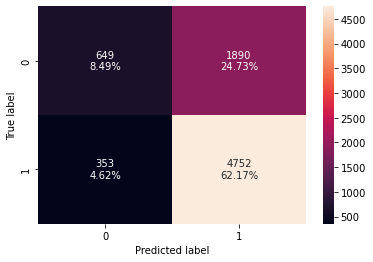

<IPython.core.display.Javascript object>

In [146]:
# Creating the confusion matrix for the test data on tuned estimator
confusion_matrix_sklearn(dtree_tuned, X_test, y_test)

In [147]:
# Creating a performance table for test data on tuned estimator
dtree_tuned_model_test_perf = model_performance_classification_sklearn(
    dtree_tuned, X_test, y_test
)
dtree_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


<IPython.core.display.Javascript object>

#### Observations:
* After the process of pruning, we obtained a good balance for all the metrics in both training and test dataset. Overall results were acceptable. the F1 score improves 8.10% on test dataset.
* In this iteration with hyperparameters, the FN values represents the 4.62%, meanwhile the FP values represents the 24.73% therefore it is evident that there was no change in the imbalance between the two.
* True Negatives represents the 8.49% and the True positives TP 62.17% so these remained almost the same.

## Building bagging and boosting models

#### Bagging Classifier default

In [148]:
# Defining the bagging classifier with random state = 1
bagging_classifier = BaggingClassifier(random_state=1)

# fitting the bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

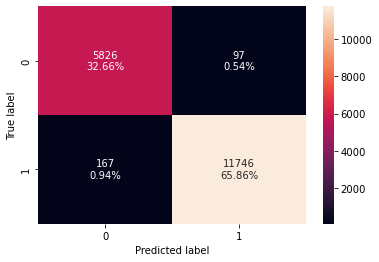

<IPython.core.display.Javascript object>

In [149]:
# Creating a confusion matrix for the training data
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [150]:
# Creating a performance table on the training data
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)

bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


<IPython.core.display.Javascript object>

#### Observations:
* The Bagging default model performs well on the training dataset, although is overfitting on it, not as the previuos Decision tree model. It need some improvements.
* In this iteration, the FN values represents the 0.94%, meanwhile the FP values represents the 0.54%.
* True Negatives represents the 32.66% and the True positives TP 65.86%.

#### Checking model performance on test set

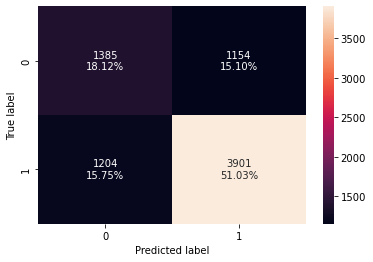

<IPython.core.display.Javascript object>

In [151]:
# Creating a confusion matrix for the test data
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [152]:
# Creating a performance table for the test data
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


<IPython.core.display.Javascript object>

#### Observations:
* The Bagging Classifier model with default parameters is overfitting the training dataset.
* The Bagging Classifier default model performs similiar to the Decision tree default, all the metric are very similiar.
* In this iteration, the FN values represents the 15.75%, meanwhile the FP values represents the 15.10% so we have a good balance between this two.
* True Negatives decrease from 32.66% to 18.12% and the True positives TP decrease as well from 65.86% to 51.03%.
* Let's see if we can reduce overfitting and improve performance on test data by applying tuning hyperparameters.

### Bagging Classifier - Hyperparameter Tuning 

In [153]:
# Choosing the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)


# Fitting the grid_obj on train data
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

<IPython.core.display.Javascript object>

#### Checking the model's performance on the training set

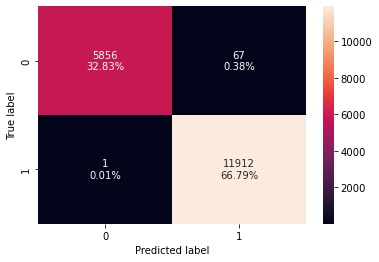

<IPython.core.display.Javascript object>

In [154]:
# Creating a confusion matrix for the training data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [155]:
# Creating a performance table for the training dataset on tuned estimator
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)

bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


<IPython.core.display.Javascript object>

#### Observations:
* The Bagging Classifier tuned model seems to be overfitting the training dataset.
* In this iteration, the FN values represents the 0.01%, meanwhile the FP values represents the 0.38%.
* True Negatives represents the 32.66% and the True positives TP represents 66.79%.

#### Checking the model's performance on the test set

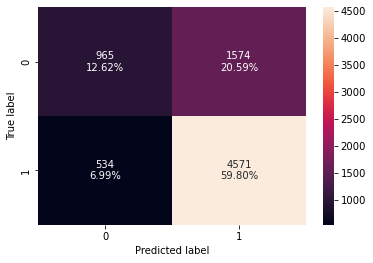

<IPython.core.display.Javascript object>

In [156]:
# Creating the confusion matrix for the test data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [157]:
# Creating a performance table for the test dataset on tuned estimator
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)

bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


<IPython.core.display.Javascript object>

#### Observations:
* The Bagging Classifier tuned model is overfitting.
* In this iteration, the FN values represents the 6.99%, meanwhile the FP values represents the 20.59% so there is an evident unbalance between FN & FP.
* True Negatives represents the 12.62% and the True positives TP represents 59.80%. The tuning process did not improve the performance of the model.

### Random Forest

In [158]:
# Defining the random forest model
# Setting random state = 1 and class_weight = balanced
rf_estimator = RandomForestClassifier(class_weight="balanced", random_state=1)

# Fitting the random forest model on the training dataset
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

 #### Checking the model's performance on the training set

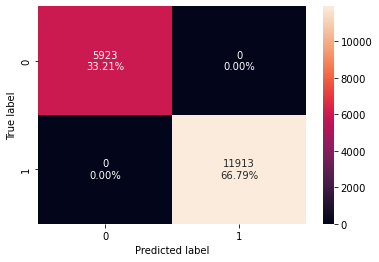

<IPython.core.display.Javascript object>

In [159]:
# Creating the confusion matrix for the training dataset
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [160]:
# Calculating the metrics of the model on the training dataset
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)

# Checking the performance on the training dataset
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Observations:
* The Random Forest default model is overfitting in the training dataset so we can expect a poor performance on the test dataset.
* In this iteration, both the FN values and the FP values represents 0% suggesting the overfitting.
* True Negatives represents the 33.21% and the True positives TP represents 66.79%. 

#### Checking model performance on test set

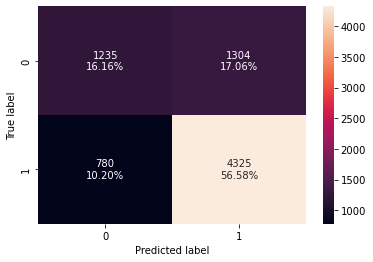

<IPython.core.display.Javascript object>

In [161]:
# Creating the confusion matrix for the test dataset
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [162]:
# Checking the performance for the test dataset
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


<IPython.core.display.Javascript object>

#### Observations:
* The Random Forest default model with default parameters is overfitting, there is a evident difference between all the metrics in comparison with the training dataset.
* In this iteration, the FN values represents the 10.20%, meanwhile the FP values represents the 17.06%.
* True Negatives decreased from 33.21% to 16.16% and the True positives TP decreased as well from 66.79% to 56.58%.
* Let's see if we can reduce overfitting and improve performance on test data by applying tuning hyperparameters to the Random Forest model.

### Random Forest with Hyperparameter Tuning 

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune  Random Forest like max_depth, min_sample_split etc.


In [163]:
# Taken from the Bagging hands on Project
# Choosing the type of the classifier
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Comparing the parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
# Running grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

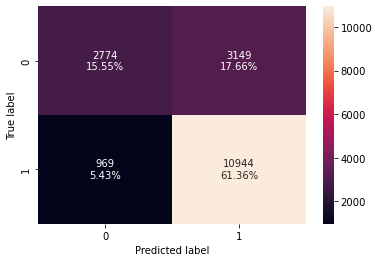

<IPython.core.display.Javascript object>

In [164]:
# Creating the confusion matrix for the training data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [165]:
# Creating a performance table for the train data on tuned estimator
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


<IPython.core.display.Javascript object>

#### Observations:
* The Random Forest tuned model is performing better in the training dataset but there is an evident unbalance between FP & FN.
* In this iteration, the FN values represents the 5.43%, meanwhile the FP values represents the 17.66%.
* True Negatives represents 15.55% and the True positives TP represents the 61.36%.
* The f1 score improved a bit in this iteration.

#### Checking model performance on test set

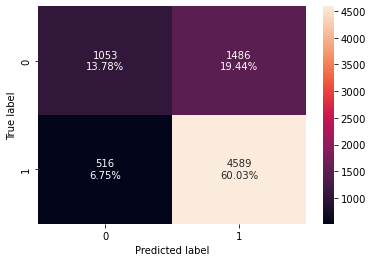

<IPython.core.display.Javascript object>

In [166]:
# Creating the confusion matrix for the test dataset on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [167]:
# Creating a performance table for the test dataset on tuned estimator
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


<IPython.core.display.Javascript object>

#### Observations:
* The Random Forest tuned model is performing good on the test dataset but there is still an evident unbalance between FP & FN.
* In this iteration, the FN values represents increased from 5.43% to 6.75%, meanwhile the FP values increased from 17.66% to 19.44%.
* True Negatives decreased from 15.55% to 13.68 and the True positives TP decreased from 61.36% to 60.03%.
* The f1 score improved slightly.

### AdaBoost Classifier Default

In [168]:
# Defining the AdaBoost Classifier with random state = 1
ab_classifier = AdaBoostClassifier(random_state=1)


# Fitting the AdaBoost Classifier on the training dataset
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

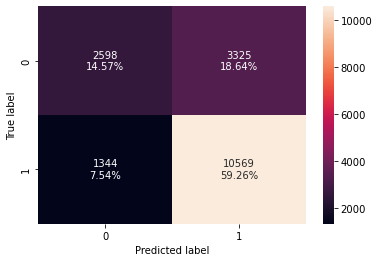

<IPython.core.display.Javascript object>

In [169]:
# Creating the confusion matrix for the training dataset
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [170]:
# Creating a performance table on the training dataset
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)

ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


<IPython.core.display.Javascript object>

#### Observations:
* The AdaBoost Classifier default model is performing good on the training dataset. Although, there is still an evident unbalance between FP & FN.
* In this iteration, the FN values represents 7.54%, meanwhile the FP values represents the 18.64%.
* True Negatives represents the 14.57% and the True positives TP represents the 59.26%.

#### Checking the model's performance on test dataset

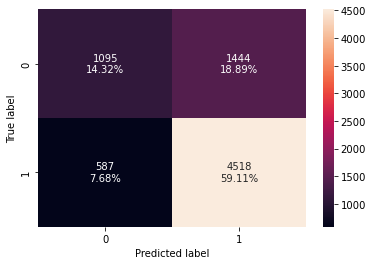

<IPython.core.display.Javascript object>

In [171]:
# Creating the confusion matrix for the test dataset
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [172]:
# Creating a performance table for the test dataset
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)

ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


<IPython.core.display.Javascript object>

#### Observations:
* The AdaBoost Classifier default model is performing good on both training and test dataset. Although, there is still a slight unbalance between FP & FN.
* In this iteration, the FN values increased from 7.54% to 7.68%, meanwhile the FP values increased slightly from 18.64% to 18.89%.
* True Negatives decreased from the 14.57% to 14.32 and the True positives TP decreased from 59.26% to 59.11%.
* The f1 score decreased slightly with respect to the previous Random Forest tuned model.

### AdaBoost Classifier - Hyperparameter Tuning

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [173]:
# Taken from Boosting hands on Project
# Choosing the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(70, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cv = 5
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)

# Fitting the grid_obj on the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Setting the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

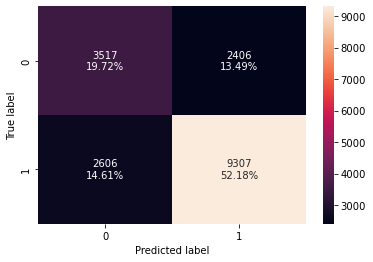

<IPython.core.display.Javascript object>

In [174]:
# Creating the confusion matrix for the training data
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [175]:
# Creating a performance table for the training data
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


<IPython.core.display.Javascript object>

#### Observations:
* The AdaBoost Classifier tuned model is performing steady on all the metrics. There is not unbalance between FP & FN.
* In this iteration, the FN values represents the 14.61%, meanwhile the FP values represents the 13.49%.
* True Negatives represents the 19.72% and the True positives TP represents the 52.18%.
* The f1 score decreased noticeably.

#### Checking model performance on test set

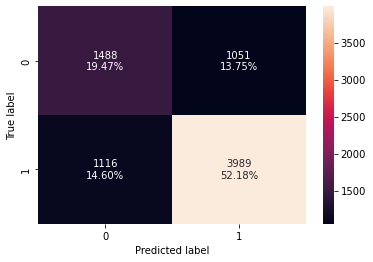

<IPython.core.display.Javascript object>

In [176]:
# Creating the confusion matrix for the test dataset
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [177]:
# Table performance for the test dataset
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


<IPython.core.display.Javascript object>

#### Observations:
* The AdaBoost Classifier tuned model is performing steady on all the metrics in both dataset. There is not unbalance between FP & FN.
* In this iteration, the FN values stayed almost the same (14.61%), meanwhile the FP values increased slightly from the 13.49% to 13.75%.
* True Negatives decreased from 19.72% to 19.47 and the True positives TP stayed the same 52.18%.
* The f1 score decreased noticeably with respect to the previous model aroun 4%.

### Gradient Boosting Classifier Default

In [178]:
# Defining the Gradient Boosting Classifier with random state = 1
gb_classifier = GradientBoostingClassifier(random_state=1)

# Fitting the Gradient Boosting Classifier on the train data
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

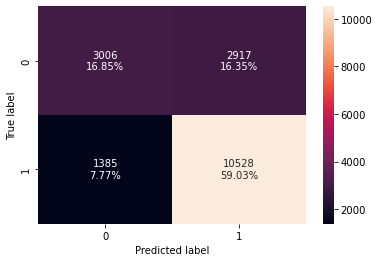

<IPython.core.display.Javascript object>

In [179]:
# Creating the confusion matrix for the training data
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [180]:
# Checking the performance on the training dataset
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)

gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


<IPython.core.display.Javascript object>

#### Observations:
* The GradientBoost Classifier default model keeps a steady performance on all the metrics as the Adaboost model did. The imbalance between FP & FN appeared again.
* In this iteration, the FN values represents the 7.77%, meanwhile the FP values represents 16.35%.
* True Negatives represents the 16.85% and the True positives TP represents the 59.03%.

#### Checking model performance on test set

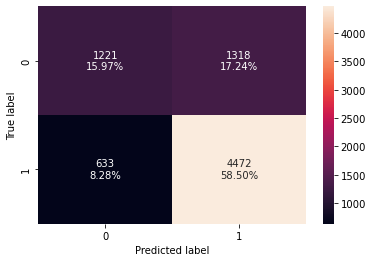

<IPython.core.display.Javascript object>

In [181]:
# Creating the confusion matrix for the test dataset
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [182]:
# Creating the performance table for the test dataset
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)

gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


<IPython.core.display.Javascript object>

#### Observations:
* The GradientBoost Classifier default model keeps a steady performance on all the metrics on both datasets as the Adaboost model did. The imbalance between FP & FN appeared again.
* In this iteration, the FN values increased from 7.77% to 8.28%, meanwhile the FP values slightly increased from 16.35% to 17.24%.
* True Negatives values decreased from 16.85% to 15.97% and the True positives TP dereased from 59.03% to 58.50%.
* The f1 score increased noticeably again with respect to the previous AdaBoost classifier tuned model.

### Gradient Boosting Classifier - Hyperparameter Tuning

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

In [183]:
# Taken from Boosting Hand on project
# Choosing the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 200],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cv = 5
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)


# Fitting the grid_obj on training dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.9)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

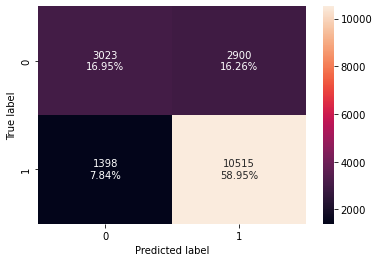

<IPython.core.display.Javascript object>

In [184]:
# Creating the confusion matrix for the train data
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [185]:
# Creating a performance table for the training data
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.759027,0.882649,0.783824,0.830306


<IPython.core.display.Javascript object>

#### Observations:
* The GradientBoost Classifier tuned model keeps a steady performance on all the metrics. There is an imbalance between FP & FN.
* In this iteration, the FN values represents the 7.84%, meanwhile the FP values represents the 16.26%.
* True Negatives values represents the 16.95% and the True positives TP the 58.95%.

#### Checking model performance on test set

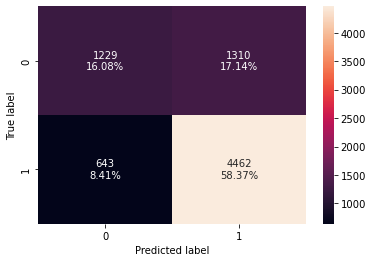

<IPython.core.display.Javascript object>

In [186]:
# Creating the confusion matrix for the test dataset on tuned estimator
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [187]:
# Creating a performance table for the test dataset
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744505,0.874045,0.773042,0.820447


<IPython.core.display.Javascript object>

#### Observations:
* The GradientBoost Classifier tuned model keeps a steady performance on all the metrics on both datasets. There is still an imbalance between FP & FN.
* In this iteration, the FN values increased from the 7.84% to 8.41%, meanwhile the FP values increased from 16.26% to 17.14%.
* True Negatives values slightly decreased from 16.95% to 16.08% and the True positives TP decreased from 58.95% to 58.37%.
* F1 Score is better than the obtained in the previous AdaBoost tuned model but it is remaining as similar to other models with 0.82.

### XGBoost Classifier default

In [188]:
# Defining the XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")

# Fitting the XGBoost Classifier on the training dataset
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

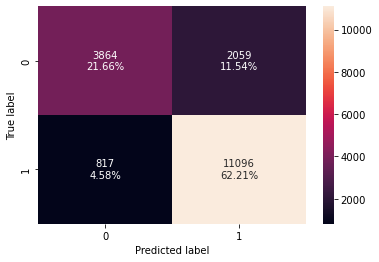

<IPython.core.display.Javascript object>

In [189]:
# Creating the confusion matrix for the training dataset
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [190]:
# Creating a performance table on the training dataset
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)

xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


<IPython.core.display.Javascript object>

#### Observations:
* The XGBoost Classifier default model seems like it is overfitting on the training dataset. We can still see an imbalance between FP & FN.
* In this iteration, the FN values represents the 4.58%, meanwhile the FP values represents the 11.54%.
* True Negatives values represents the 21.66% and the True positives TP represents the 62.21%.

#### Checking model performance on test set

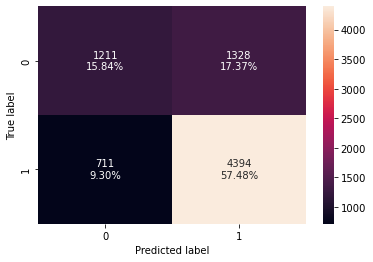

<IPython.core.display.Javascript object>

In [191]:
# Creating the confusion matrix for test dataset
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [192]:
# Creating a performance table for the test dataset
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)

xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


<IPython.core.display.Javascript object>

#### Observations:
* The XGBoost Classifier default model is overfitting. The imbalance between FP & FN has been slightly reduced.
* In this iteration, the FN values increased from 4.58% to 9.30%, meanwhile the FP values increased from 11.54% to 17.37%.
* True Negatives values decreased from 21.66% to 15.84% and the True positives TP decreased from 62.21% to 57.48%.
* The performance is well balanced between all the metrics. Although, it is slightly lower than the Gradient Boost tuned model.

### XGBoost Classifier - Hyperparameter Tuning

In [193]:
# Choosing the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cv = 5
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)

# fitting the grid_obj on the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=5,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

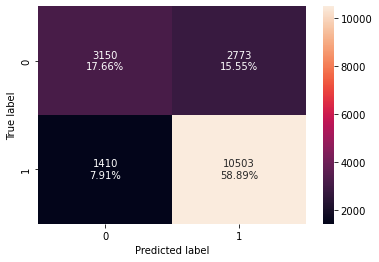

<IPython.core.display.Javascript object>

In [194]:
# Creating the confusion matrix for the training data
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [195]:
# Creating a performance table for the training dataset
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.765474,0.881642,0.791127,0.833935


<IPython.core.display.Javascript object>

#### Observations:
* The XGBoost Classifier tuned model is performing well and balanced. The imbalance between FP & FN has been slightly reduced.
* In this iteration, the FN values represents the 7.91%, meanwhile the FP values represents the 15.55%.
* True Negatives values represents the 17.66% and the True positives TP values represents the 58.89%.
* The performance is well balanced between all the metrics. F1 score is very similiar to other models.

#### Checking model performance on test set

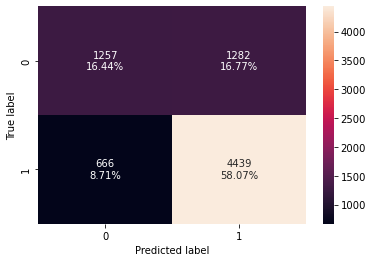

<IPython.core.display.Javascript object>

In [196]:
# Creating the confusion matrix for the training data
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [197]:
# Creating a performance table for the test data
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74516,0.86954,0.775913,0.820063


<IPython.core.display.Javascript object>

#### Observations:
* The XGBoost Classifier tuned model is performing good and balanced on the metrics. It has reduce the overfitting comparing with the default model. The imbalance between FP & FN has been slightly reduced.
* In this iteration, the FN values increased from 7.91% to 8.71%, meanwhile the FP values increased from 15.55% to 16.77%.
* True Negatives values decreased from 17.66% to 16.44% and the True positives TP values have decreased from 58.89% to 58.07%.
* The performance is well balanced between all the metrics. F1 score is very similiar to other models with 0.82.

### Stacking Classifier

In [198]:
# Taken from Bike sharing project
# Defining the Stacking Classifier model
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator, cv=5
)

# Fitting the Stacking Classifier on the trainning data
stacking_classifier.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_s...
                                 

<IPython.core.display.Javascript object>

#### Checking model performance on training set

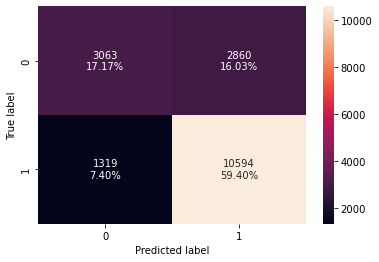

<IPython.core.display.Javascript object>

In [199]:
# Creating the confusion matrix for the training dataset
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [200]:
# Creating a performance table on the training dataset
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)

stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.765699,0.889281,0.787424,0.835258


<IPython.core.display.Javascript object>

#### Observations:
* The Stacking Classifier model is performing well and balanced on all the metrics. There is an imbalance between the FN and the FP.
* In this iteration, the FN values represents the 7.40%, meanwhile the FP values represents the 16.03%.
* True Negatives values represents the 17.17% and the True positives TP values the 59.40%.

#### Checking model performance on test set

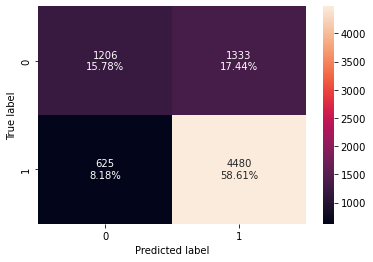

<IPython.core.display.Javascript object>

In [201]:
# Creating the confusion matrix for test dataset
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [202]:
# Creating the performance table for the test dataset
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743851,0.877571,0.770686,0.820663


<IPython.core.display.Javascript object>

#### Observations:
* The Stacking Classifier model has a good fit on both datasets. There is an imbalance between the FN and the FP.
* In this iteration, the FN values increased from 7.40% to 8.18%, meanwhile the FP values increased from 16.03% to 17.44%.
* True Negatives values decreased from 17.17% to 15.78% and the True positives TP values slightly decreased from 59.40% to 58.61%.
* F1 score is similar to other models with a not noticeably variation.

### Comparing all models

In [203]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,1.0,0.769119,0.738226,0.718995,0.758802,0.759027,0.838753,0.765474,0.765699
Recall,1.0,0.931923,0.985982,0.999916,1.0,0.918660,0.887182,0.781247,0.883740,0.882649,0.931419,0.881642,0.889281
Precision,1.0,0.720067,0.991810,0.994407,1.0,0.776556,0.760688,0.794587,0.783042,0.783824,0.843482,0.791127,0.787424
F1,1.0,0.812411,0.988887,0.997154,1.0,0.841652,0.819080,0.787861,0.830349,0.830306,0.885272,0.833935,0.835258


<IPython.core.display.Javascript object>

In [204]:
# test performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.727368,0.738095,0.734301,0.716510,0.744767,0.744505,0.733255,0.745160,0.743851
Recall,0.742801,0.930852,0.764153,0.895397,0.847209,0.898923,0.885015,0.781391,0.876004,0.874045,0.860725,0.869540,0.877571
Precision,0.752232,0.715447,0.771711,0.743857,0.768343,0.755391,0.757799,0.791468,0.772366,0.773042,0.767913,0.775913,0.770686
F1,0.747487,0.809058,0.767913,0.812622,0.805851,0.820930,0.816481,0.786397,0.820927,0.820447,0.811675,0.820063,0.820663


<IPython.core.display.Javascript object>

### Important features of the final model

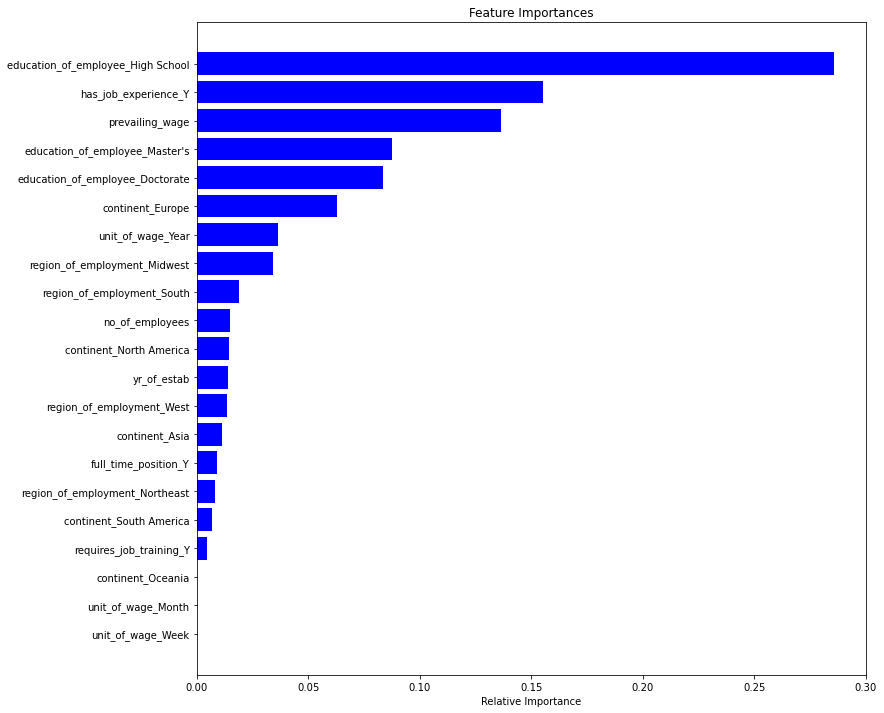

<IPython.core.display.Javascript object>

In [205]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* According to the graph, the first 10 feature importances for the train dataset are as follow: 
 * 1.-education_of_employee_high_school
 * 2.-has_job_experience_Y
 * 3.-prevailing_wage
 * 4.-education_of_employee_Master's 
 * 5.-education_of_employee_Doctorate
 * 6.-continent_Europe
 * 7.-unit_of_wage_Year
 * 8.-region_of_employment_Midwest
 * 9.-region_of_employment_South 
 * 10.-no_of_employees

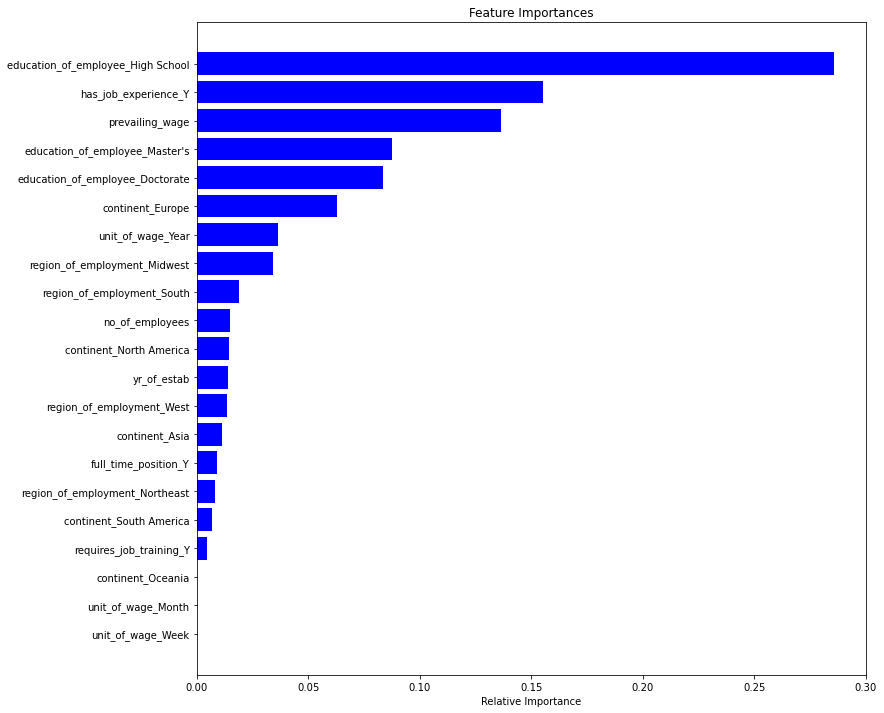

<IPython.core.display.Javascript object>

In [206]:
feature_names = X_test.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* According to the graph, the first 10 feature importances for the train dataset are as follow: 
 * 1.-education_of_employee_high_school
 * 2.-has_job_experience_Y
 * 3.-prevailing_wage
 * 4.-education_of_employee_Master's 
 * 5.-education_of_employee_Doctorate
 * 6.-continent_Europe
 * 7.-unit_of_wage_Year
 * 8.-region_of_employment_Midwest
 * 9.-region_of_employment_South 
 * 10.-no_of_employees
 
* There was not variation in the first 10 feature importances in the train and the test data.

##  Will tuning the hyperparameters improve the model performance?

* For this project:
 * The Decision Tree tuned improve the performance but the metrics were not balanced.
 * The Bagging tuned model did not improve the metrics of the model made by the default model.
 * The Random Forest tuned model improved almost all the metrics but they were unbalanced.
 * The AdaBoost tuned model improved some metrics notably but in most decrease performance.
 * The Gradient Boosting tuned model remained practically the same as the version made by default.
 * The XGBoost tuned model only improved two of the metrics and the others decreased their performance.
 * The Stacking model had a good fit on both sets. The F1 score results were comparable with other models, with no major variations.

## Model Performance Comparison and Conclusions

* Decision Tree & Random Forest models overfits on the training dataset but both had notable improvements after applying the hyperparameters. 
* In this project, it is important to highlight that the initial Bagging models, both pre-tuned and tuned tended to overfit on the train dataset. 
* The XGBoost model overfits a little bit on the train dataset on the pre-tuned model. Although, it reduced the overfitting after applying the hyperparameters.
* The AdaBoost model performed slightly better with the default conditions or pre-tuned, but instead it reduced its performance after applying the hyperparameters.
* The Stacking model had a very steady performance on the metrics and kept the f1 score in 0.82 in the test data as other models did.
* The Gradient Boost Model had a steady, balanced and similar performance either before and after the tuning process. In fact, the F1 score metric was practically the same in both models 0.83-0.82. So having on mind that, we should select the less complex model with the best metrics, this is the reason I consider that the Gradient Boost pre-hyperparameters is the right one in this case.

## Actionable Insights and Recommendations

* There is an anomaly in the distribution of the prevailing wage variable around 5000.
* We can observe a positive(+) skewness and the kurtosis tends to be Platykurtic or negative for the prevailing wage variable.
* 2682 samples in prevailing wage are under 5000.
* 2402 samples in prevailing wage are under 2500.
* 2267 samples in prevailing wage are under 1000.
* 1394 samples in prevailing wage are under 500.
* We can observe a negative(-) skewness and the kurtosis seems to be positive or leptokurtic in the year of stablished variable. There are outliers under the lower whisker around 1932. Median(1997) and mode(1998) are very close from each other. The mean is 1979.
* Asia applicants domains with 66.2%, followed by Europe with 14.6% of the samples, the 12.9% corresponds to North America, the 3.3% corresponds to South America, 2.2% to Africa, and the lowest percentage corresponds to the samples from Oceania with 0.8%.
* 11012 samples out 16861 belongs to the samples coming from Asia as the continent and the Visa was Certified, representing the 65.31% of the total samples coming from Asia.
* 5849 samples out 16861 belongs to the samples coming from Asia as the continent and the Visa was Denied, representing the 34.68% of the total samples coming from Asia.
* 2957 samples out 3732 belongs to the samples coming from Europe as the continent and the Visa was Certified, representing the 79.23% of the total samples coming from Europe.
* 775 samples out 3732 belongs to the samples coming from Europe as the continent and the Visa was Denied, representing the 20.76% of the total samples coming from Europe.
* 2037 samples out 3292 belongs to the samples coming from North America as the continent and the Visa was Certified, representing the 61.87% of the total samples coming from North America.
* 1255 samples out 3292 belongs to the samples coming from North America as the continent and the Visa was Denied, representing the 38.12% of the total samples coming from North America.
* 493 samples out 852 belongs to the samples coming from South America as the continent and the Visa was Certified, representing the 57.86% of the total samples coming from South America.
* 359 samples out 852 belongs to the samples coming from South America as the continent and the Visa was Denied, representing the 42.13% of the total samples coming from South America.
* The highest certification rate belongs to the people coming from Europe with 79.23%, followed by the people coming from Africa with 72%.
* The highest Denied rate belongs to the people coming from South America with 42.13%, followed by the people coming from North America with 38.12%.
* Bachelor's domains with 40.2%, followed by the people with a Master's degree with 37.8% of the samples, the 13.4% corresponds to High School degree, and the lowest percentage corresponds to the samples with Doctorate degree with 8.6%.
* 6367 samples out 10234 belongs to the samples with a Bachelor degree and the Visa was Certified, representing the 62.21% of the total samples with a Bachelor degree.
* 3867 samples out 10234 belongs to the samples with a Bachelor degree and the Visa was Denied, representing the 37.78% of the total samples with a Bachelor degree.
* 7575 samples out 9634 belongs to the samples with a Master's degree and the Visa was Certified, representing the 78.62% of the total samples with a Master's degree.
* 2059 samples out 9634 belongs to the samples with a Master's degree and the Visa was Denied, representing the 21.37% of the total samples with a Master's degree.
* 1164 samples out 3420 belongs to the samples with a High School degree and the Visa was Certified, representing the 34.03% of the total samples with a High School degree.
* 2256 samples out 3420 belongs to the samples with a High School degree and the Visa was Denied, representing the 65.96% of the total samples with a High School degree.
* 1912 samples out 2192 belongs to the samples with a Doctorate degree and the Visa was Certified, representing the 87.22% of the total samples with a Doctorate degree.
* 280 samples out 2192 belongs to the samples with a Doctorate degree and the Visa was Denied, representing the 12.77% of the total samples with a Doctorate degree.
* The highest certification rate belongs to the people with a Doctorate degree with 87.22%, followed by the people with a Master's degree with 78.62%.
* The highest Denied rate belongs to the people with a High School degree 65.96%, followed by the people with Bachelor degree with 37.78%.
* People with job experience domains with 58.1% and the remaining 41.9% belongs to the samples with NO job  experience.
* 11024 samples out 14802 belongs to the samples with Job experience and the Visa was Certified, representing the 74.47% of the total samples with JOB EXPERIENCE.
* 3778 samples out 14802 belongs to the samples with Job experience and the Visa was Denied, representing the 25.52% of the total samples with JOB EXPERIENCE.
* 5994 samples out 10678 belongs to the samples with NO JOB EXPERIENCE and the Visa was Certified, representing the 56.13% of the total samples with NO JOB EXPERIENCE.
* 4684 samples out 10678 belongs to the samples with NO JOB EXPERIENCE and the Visa was Denied, representing the 43.86% of the total samples with NO JOB EXPERIENCE.
* In general and as is logical, the visa denial rate increases to more than 40% if you do not have Job experience.
* People who does not requires job training domains with 88.4% and the remaining 11.6% belongs to the samples which requires job training.
* 2006 samples out 2955 belongs to the samples which requires job training and the Visa was Certified, representing the 67.88% of the total samples which requires job training.
* 949 samples out 2955 belongs to the samples which requires job training and the Visa was Denied, representing the 32.11% of the total samples which requires job training.
* 15012 samples out 22525 belongs to the samples which NOT requires job training and the Visa was Certified, representing the 66.64% of the total samples which NOT requires job training.
* 7513 samples out 22525 belongs to the samples which NOT requires job training and the Visa was Denied, representing the 33.35% of the total samples which NOT requires job training.
* The rate remains almost the same for certified and denied Visas for the require_job_training variable, both around 35%, in the case of denied visas, and around 65% for certified visas.
* Northeast region domains with 28.2%, followed by the South region with 27.5% of the samples, the 25.8% corresponds to the North region, the 16.9% corresponds to Midwest, and the 1.5% to the Island region.
* 4526 samples out 7195 belongs to the samples coming from Northeast region and the Visa was Certified, representing the 62.90% of the total samples coming from Northeast.
* 2669 samples out 7195 belongs to the samples coming from Northeast region and the Visa was Denied, representing the 37.09% of the total samples coming from the South region.
* 4913 samples out 7017 belongs to the samples coming from South region and the Visa was Certified, representing the 70% of the total samples coming from Northeast.
* 2104 samples out 7017 belongs to the samples coming from South region and the Visa was Denied, representing the 30% of the total samples coming from the South region.
* 4100 samples out 6586 belongs to the samples coming from West region and the Visa was Certified, representing the 62.25% of the total samples coming from West.
* 2486 samples out 6586 belongs to the samples coming from West region and the Visa was Denied, representing the 37.74% of the total samples coming from the West region.
* 3253 samples out 4307 belongs to the samples coming from Midwest region and the Visa was Certified, representing the 75.52% of the total samples coming from Midwest.
* 1054 samples out 4307 belongs to the samples coming from Midwest region and the Visa was Denied, representing the 24.47% of the total samples coming from the Midwest region.
* 226 samples out 375 belongs to the samples coming from the Island region and the Visa was Certified, representing the 60.26% of the total samples coming from the Island region.
* 149 samples out 375 belongs to the samples coming from the Island region and the Visa was Denied, representing the 39.73% of the total samples coming from the Island region.
* The highest Denied rate belongs to the samples coming from the Island region with 40%, followed by the samples coming from Northeast region with 37%.
* The highest certified rate belongs to the samples coming from the Midwest region with 75.52%, followed by the samples coming from the South region with 70%.
* The largest number of applications for the region of the islands (161) are made by people with a Master's degree, while the fewest number of applications come from people with a Doctorate degree (25).
* The largest number of applications for the region of the Midwest are made by people with a Master's degree as well (2000), while the fewest number of applications come from people with a Doctorate degree(256).
* The largest number of applications for the region of the Northeast are made by people with a Bachelor's degree (2874), while the fewest number of applications come from people with a Doctorate degree(656).
* The largest number of applications for the South region are made by people with a Bachelor's degree (2991), while the fewest number of applications come from people with a Doctorate degree(541).
* The largest number of applications for the West region are made by people with a Bachelor's degree (2925), while the fewest number of applications come from people with a Doctorate degree(714).
* The largest number of applications are made by the majority of people with bachelor degrees, except in the regions of the Islands and the Midwest while the fewest number of applications in all regions come from people with a Doctorate degree.
* Year option domains with 90.1%, followed by the hour unit of wage with 8.5% of the samples, the 1.1% corresponds to the Week option, and the 0.3% corresponds to month option.
* 16047 samples out 22962 belongs to the samples coming from the Year option and the Visa was Certified, representing the 69.88% of the total samples coming from the Year option.
* 6915 samples out 22962 belongs to the samples coming from the Year option and the Visa was Denied, representing the 30.11% of the total samples coming from the Year option.
* 747 samples out 2157 belongs to the samples coming from the Hour option and the Visa was Certified, representing the 34.63% of the total samples coming from the Hour option.
* 1410 samples out 2157 belongs to the samples coming from the Hour option and the Visa was Denied, representing the 65.36% of the total samples coming from the Hour option.
* The highest Denied rate belongs to the samples coming from the Hour Option with 65%, followed by the samples coming from the Month and Week options around 40%.
* The highest certified rate belongs to the samples coming from the Year option with almost 70%, followed by the samples coming from the Month and Week options around 60%.
* We can observe that the variance is very similar in all the regions.
* The mean and the median remains almost equal between the West, Northeast and South regions meanwhile is a little bit higher in the Midwest and Island regions.
* The maximun and the minimun prevailing wage value belongs to the Midwest region.
* There are some outliers in all the regions against prevailing wage.
* All the regions seems to have a normal distribution for prevailing wage.
* Outliers seems to be in a normal range for the purpose of this project. Although, we would have to investigate a little more about the conditions that apply to each region.
* We can observe that the variance is very similar in both categories (Certified and Denied) for all the regions.
* The mean and the median is a little bit higher in the Midwest region.
* The maximun and the minimun prevailing wage value in both categories belongs to the Midwest region.
* There are some outliers in all the regions for both categories.
* All the regions and categories(Certified and Denied) seems to have a normal distribution.
* Seems to be higher the mean and the median in all the regions where the Visas were Denied except in the Island region.
* Outliers seems to be in a normal range for the purpose of this project. Although, we would have to investigate a little more about the conditions that apply to each region.
* Positions for hourly wages have the highest denied rate wit 65%.
* Monthly and Weekly positions have fewer applications and have a denied rate of 38% for each one.
* The lowest denied rate is for positions with yearly wages with 30%.
* Denied Visas have a lower prevailing wage than the cases that are certified.
* For both cases, prevailing wages have a large distribution with significant number of outliers, but have a lot of similarities between them, like lower and upper quartiles, lower and upper whiskers, minimum and maximum values.
* The data should contain information related to the field of work of the applicants because we know that in some countries the visa will depend on the type of work that the applicant performs. If by the time of application workers are urgently required in certain areas, this will facilitate the selection process for applicants
* People who only have a high degree should make sure they take some technical courses or careers that facilitate their selection process.
* When you are doing an application for this type of visa, it is important to have some type of work experience because 3 of 4 work visa applications with previous job experience get approved.
* Applicants must consider having a greater degree than high school or bachelor's degree if they want to increase their odds to receive the Visa
* Applicants must consider positions with a yearly wage to increase their odds of being approved by over 70% of the cases.
* Regions are looking for educated people predominantly with Master's and Doctorate degrees.
* The European people posses the highest probabilities of being approved (4 out of 5 applications) meanwhile the South American applications has the lowest chance of being approved.
* If we set the highest probability of being approved would be something like: an European applicant with a Doctorate or Master, who possess relevant experience for the field of application, with a yearly prevailing wage, within the regions of Midwest or South.